In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/project_risk_raw_dataset.csv')

In [3]:
data.head(10)

Project_ID   Project_Type  Team_Size  Project_Budget_USD  \
0  PROJ_0001   Construction         32          1526276.55   
1  PROJ_0002  Manufacturing          2           390790.15   
2  PROJ_0003  Manufacturing          2           246674.76   
3  PROJ_0004             IT         12          1427830.63   
4  PROJ_0005   Construction         24          1696746.64   
5  PROJ_0006             IT         13          1106456.85   
6  PROJ_0007            R&D         12          1122048.59   
7  PROJ_0008     Healthcare          9          1208078.86   
8  PROJ_0009   Construction         37          1833354.63   
9  PROJ_0010   Construction         41          2404494.18   

   Estimated_Timeline_Months  Complexity_Score  Stakeholder_Count  \
0                         32              9.70                 16   
1                          9              2.72                  9   
2                          6              2.04                  7   
3                         17              7.54                 16   
4                         24              6.68                 17   
5                         18              7.11                 12   
6                         21             10.00                 11   
7                         15              4.53                  9   
8                         35              9.49                 13   
9                         28              5.09                 18   

  Methodology_Used Team_Experience_Level  Past_Similar_Projects  ...  \
0        Waterfall                Senior                      3  ...   
1           Kanban                 Mixed                      0  ...   
2            Agile                 Mixed                      1  ...   
3            Scrum                 Mixed                      0  ...   
4           Hybrid                Junior                      0  ...   
5           Kanban                 Mixed                      0  ...   
6            Scrum                Senior                      3  ...   
7           Kanban                 Mixed                      3  ...   
8        Waterfall                 Mixed                      0  ...   
9        Waterfall                Senior                      2  ...   

   Industry_Volatility  Client_Experience_Level Change_Control_Maturity  \
0              Extreme               First-time                   Basic   
1               Stable               Occasional                Advanced   
2               Stable                  Regular                     NaN   
3              Extreme                Strategic                  Formal   
4             Moderate               Occasional                   Basic   
5               Stable                Strategic                  Formal   
6                 High               First-time                   Basic   
7                 High                Strategic                  Formal   
8                 High               Occasional                   Basic   
9             Moderate                Strategic                     NaN   

  Risk_Management_Maturity      Team_Colocation  Documentation_Quality  \
0                    Basic      Fully Colocated                   Good   
1                   Formal         Fully Remote                   Poor   
2                      NaN               Hybrid                   Good   
3                    Basic               Hybrid                  Basic   
4                      NaN  Partially Colocated                  Basic   
5                 Advanced               Hybrid                  Basic   
6                      NaN      Fully Colocated                   Good   
7                    Basic  Partially Colocated                   Poor   
8                   Formal      Fully Colocated                  Basic   
9                      NaN      Fully Colocated                  Basic   

   Project_Start_Month  Current_Phase_Duration_Months Seasonal_Risk_Factor  \
0                   10                         

In [4]:
data.drop('Project_ID', axis=1, inplace=True)

In [5]:
data.shape

(4000, 50)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Project_Type                     4000 non-null   object 
 1   Team_Size                        4000 non-null   int64  
 2   Project_Budget_USD               4000 non-null   float64
 3   Estimated_Timeline_Months        4000 non-null   int64  
 4   Complexity_Score                 4000 non-null   float64
 5   Stakeholder_Count                4000 non-null   int64  
 6   Methodology_Used                 4000 non-null   object 
 7   Team_Experience_Level            4000 non-null   object 
 8   Past_Similar_Projects            4000 non-null   int64  
 9   External_Dependencies_Count      4000 non-null   int64  
 10  Change_Request_Frequency         4000 non-null   float64
 11  Project_Phase                    4000 non-null   object 
 12  Requirement_Stabilit

In [7]:
data.describe()

Team_Size  Project_Budget_USD  Estimated_Timeline_Months  \
count  4000.000000        4.000000e+03                4000.000000   
mean     15.388250        1.143032e+06                  17.147750   
std       9.220969        5.908781e+05                   6.926609   
min       2.000000        1.593555e+05                   2.000000   
25%       9.000000        6.925329e+05                  12.000000   
50%      13.000000        1.007472e+06                  17.000000   
75%      20.000000        1.475870e+06                  22.000000   
max      50.000000        3.768354e+06                  36.000000   

       Complexity_Score  Stakeholder_Count  Past_Similar_Projects  \
count       4000.000000        4000.000000            4000.000000   
mean           6.192525          11.130500               1.973750   
std            2.212538           4.425875               1.750093   
min            1.620000           2.000000               0.000000   
25%            4.460000           8.000000               1.000000   
50%            6.015000          10.000000               2.000000   
75%            7.862500          14.000000               3.000000   
max           10.000000          29.000000              10.000000   

       External_Dependencies_Count  Change_Request_Frequency  \
count                  4000.000000               4000.000000   
mean                      3.127750                  1.638080   
std                       1.609216                  1.170451   
min                       0.000000                  0.010000   
25%                       2.000000                  0.760000   
50%                       3.000000                  1.370000   
75%                       4.000000                  2.230000   
max                       7.000000                  8.840000   

       Team_Turnover_Rate  Vendor_Reliability_Score  ...  Market_Volatility  \
count         4000.000000               4000.000000  ...         4000.00000   
mean             0.292725                  0.712087  ...            0.49716   
std              0.166546                  0.163418  ...            0.28702   
min              0.000000                  0.090000  ...            0.00000   
25%              0.160000                  0.600000  ...            0.25000   
50%              0.270000                  0.730000  ...            0.50000   
75%              0.400000                  0.840000  ...            0.74000   
max              0.850000                  1.000000  ...            1.00000   

       Integration_Complexity  Resource_Availability  \
count             4000.000000            4000.000000   
mean                 5.573585               0.651695   
std                  2.606654               0.201163   
min                  1.000000               0.300000   
25%                  3.317500               0.480000   
50%                  5.600000               0.650000   
75%                  7.860000               0.820000   
max                 10.000000               1.000000   

       Organizational_Change_Frequency  Cross_Functional_Dependencies  \
count                      4000.000000                    4000.000000   
mean                          1.212215                       3.549250   
std                           0.969191                       2.320004   
min                           0.000000                       0.000000   
25%                           0.500000                       2.000000   
50%                           0.960000                       4.000000   
75%                           1.660000                       6.000000   
max                           8.230000                       7.000000   

       Previous_Delivery_Success_Rate  Technical_Debt_Level  \
count                     4000.000000            4000.00000   
mean                         0.750437               0.17544   
std                          0.143712               0.29682   
min                          0.150000               0.00000  

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Risk_Level'])
y = data['Risk_Level']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (3200, 49)
Testing set size: (800, 49)


In [10]:
data.isnull().sum()

Project_Type                          0
Team_Size                             0
Project_Budget_USD                    0
Estimated_Timeline_Months             0
Complexity_Score                      0
Stakeholder_Count                     0
Methodology_Used                      0
Team_Experience_Level                 0
Past_Similar_Projects                 0
External_Dependencies_Count           0
Change_Request_Frequency              0
Project_Phase                         0
Requirement_Stability                 0
Team_Turnover_Rate                    0
Vendor_Reliability_Score              0
Historical_Risk_Incidents             0
Communication_Frequency               0
Regulatory_Compliance_Level           0
Technology_Familiarity                0
Geographical_Distribution             0
Stakeholder_Engagement_Level          0
Schedule_Pressure                     0
Budget_Utilization_Rate               0
Executive_Sponsorship                 0
Funding_Source                        0
Market_Volatility                     0
Integration_Complexity                0
Resource_Availability                 0
Priority_Level                        0
Organizational_Change_Frequency       0
Cross_Functional_Dependencies         0
Previous_Delivery_Success_Rate        0
Technical_Debt_Level                  0
Project_Manager_Experience            0
Org_Process_Maturity                  0
Data_Security_Requirements            0
Key_Stakeholder_Availability          0
Tech_Environment_Stability         2619
Contract_Type                         0
Resource_Contention_Level             0
Industry_Volatility                   0
Client_Experience_Level               0
Change_Control_Maturity             780
Risk_Management_Maturity            791
Team_Colocation                       0
Documentation_Quality                 0
Project_Start_Month                   0
Current_Phase_Duration_Months         0
Seasonal_Risk_Factor                  0
Risk_Level                            0
dtype: int64

In [11]:
columns_to_analyze = ['Tech_Environment_Stability', 'Change_Control_Maturity', 'Risk_Management_Maturity']

# Calculate and print the percentage of missing values for each column
print("Percentage of missing values:")
for col in columns_to_analyze:
    missing_percentage = (data[col].isnull().sum() / len(data)) * 100
    print(f"{col}: {missing_percentage:.2f}%")

print("\nUnique values for each column:")
for col in columns_to_analyze:
    unique_values = data[col].unique()
    print(f"{col}: {unique_values}")

Percentage of missing values:
Tech_Environment_Stability: 65.48%
Change_Control_Maturity: 19.50%
Risk_Management_Maturity: 19.78%

Unique values for each column:
Tech_Environment_Stability: [nan 'Mixed' 'Legacy/Unstable' 'Modern/Stable']
Change_Control_Maturity: ['Basic' 'Advanced' nan 'Formal']
Risk_Management_Maturity: ['Basic' 'Formal' nan 'Advanced']


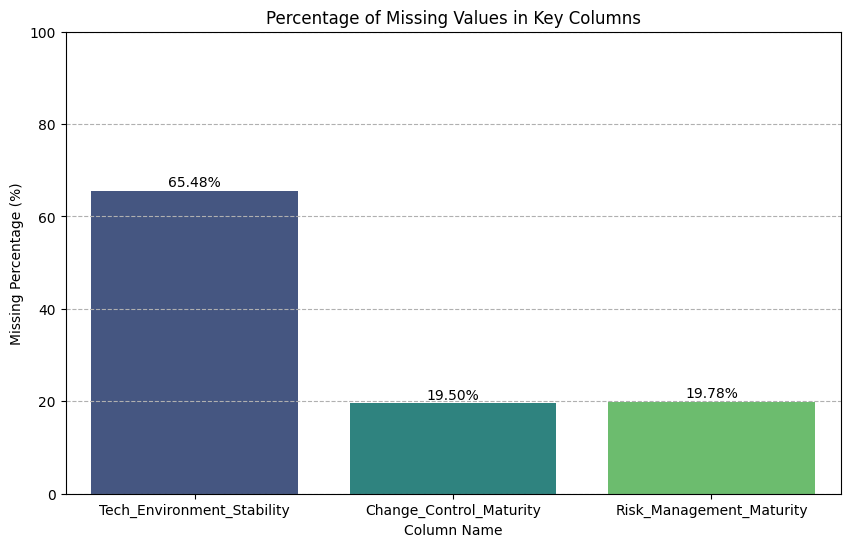

In [12]:
missing_percentages = {}
for col in columns_to_analyze:
    missing_percentages[col] = (data[col].isnull().sum() / len(data)) * 100

missing_df = pd.DataFrame(missing_percentages.items(), columns=['Column', 'Missing_Percentage'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Column', y='Missing_Percentage', data=missing_df, palette='viridis', hue='Column', legend=False)
plt.title('Percentage of Missing Values in Key Columns')
plt.xlabel('Column Name')
plt.ylabel('Missing Percentage (%)')
plt.ylim(0, 100) # Set y-axis limit from 0 to 100 for percentage
for index, row in missing_df.iterrows():
    plt.text(index, row['Missing_Percentage'] + 1, f"{row['Missing_Percentage']:.2f}%", color='black', ha="center")
plt.grid(axis='y', linestyle='--')
plt.show()

In [13]:
# Drop 'Tech_Environment_Stability' column if it exists
if 'Tech_Environment_Stability' in data.columns:
    data.drop('Tech_Environment_Stability', axis=1, inplace=True)

# Impute missing values in 'Change_Control_Maturity' and 'Risk_Management_Maturity' with 'Unknown'
data['Change_Control_Maturity'] = data['Change_Control_Maturity'].fillna('Unknown')
data['Risk_Management_Maturity'] = data['Risk_Management_Maturity'].fillna('Unknown')

print("Missing values after cleaning:")
print(data[['Change_Control_Maturity', 'Risk_Management_Maturity']].isnull().sum())

Missing values after cleaning:
Change_Control_Maturity     0
Risk_Management_Maturity    0
dtype: int64


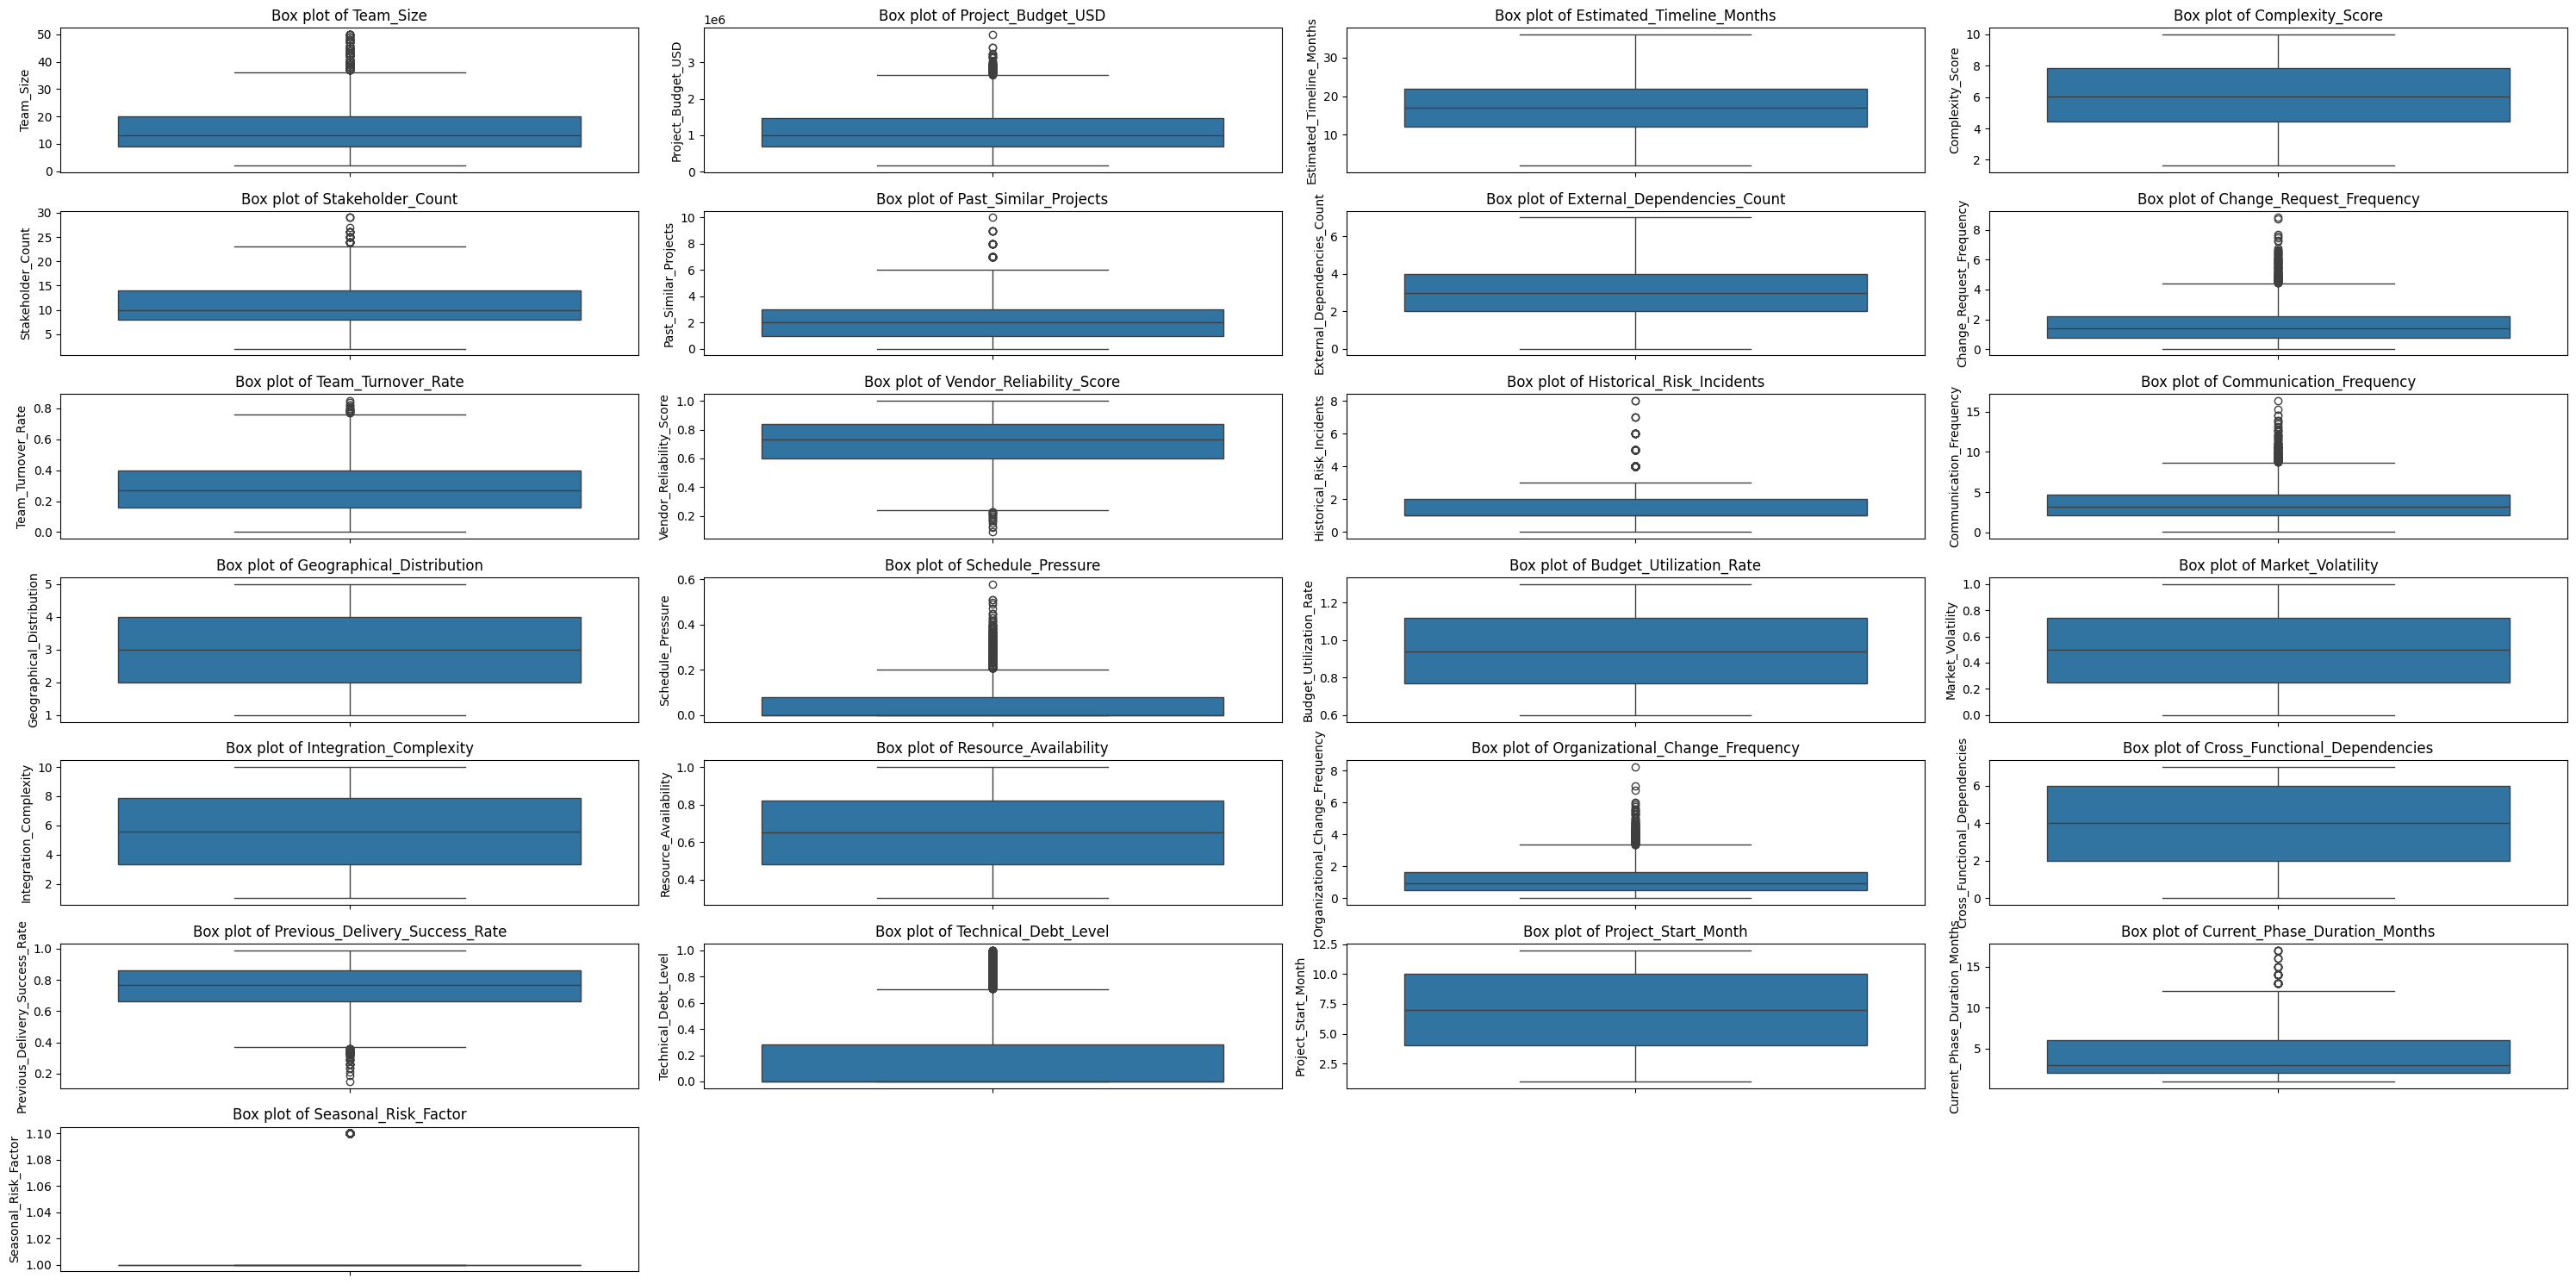

In [14]:
numerical_cols = data.select_dtypes(include=np.number).columns

plt.figure(figsize=(30, 15))
for i, column in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 4 + 1, 4, i + 1)  # Adjust subplot grid as needed
    sns.boxplot(y=data[column])
    plt.title(f'Box plot of {column}')
    plt.tight_layout()
plt.show()

In [15]:
numerical_cols = data.select_dtypes(include=np.number).columns

for column in numerical_cols:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Apply capping/Winsorization
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

print("Outliers handled using capping/Winsorization for all numerical columns.")

Outliers handled using capping/Winsorization for all numerical columns.


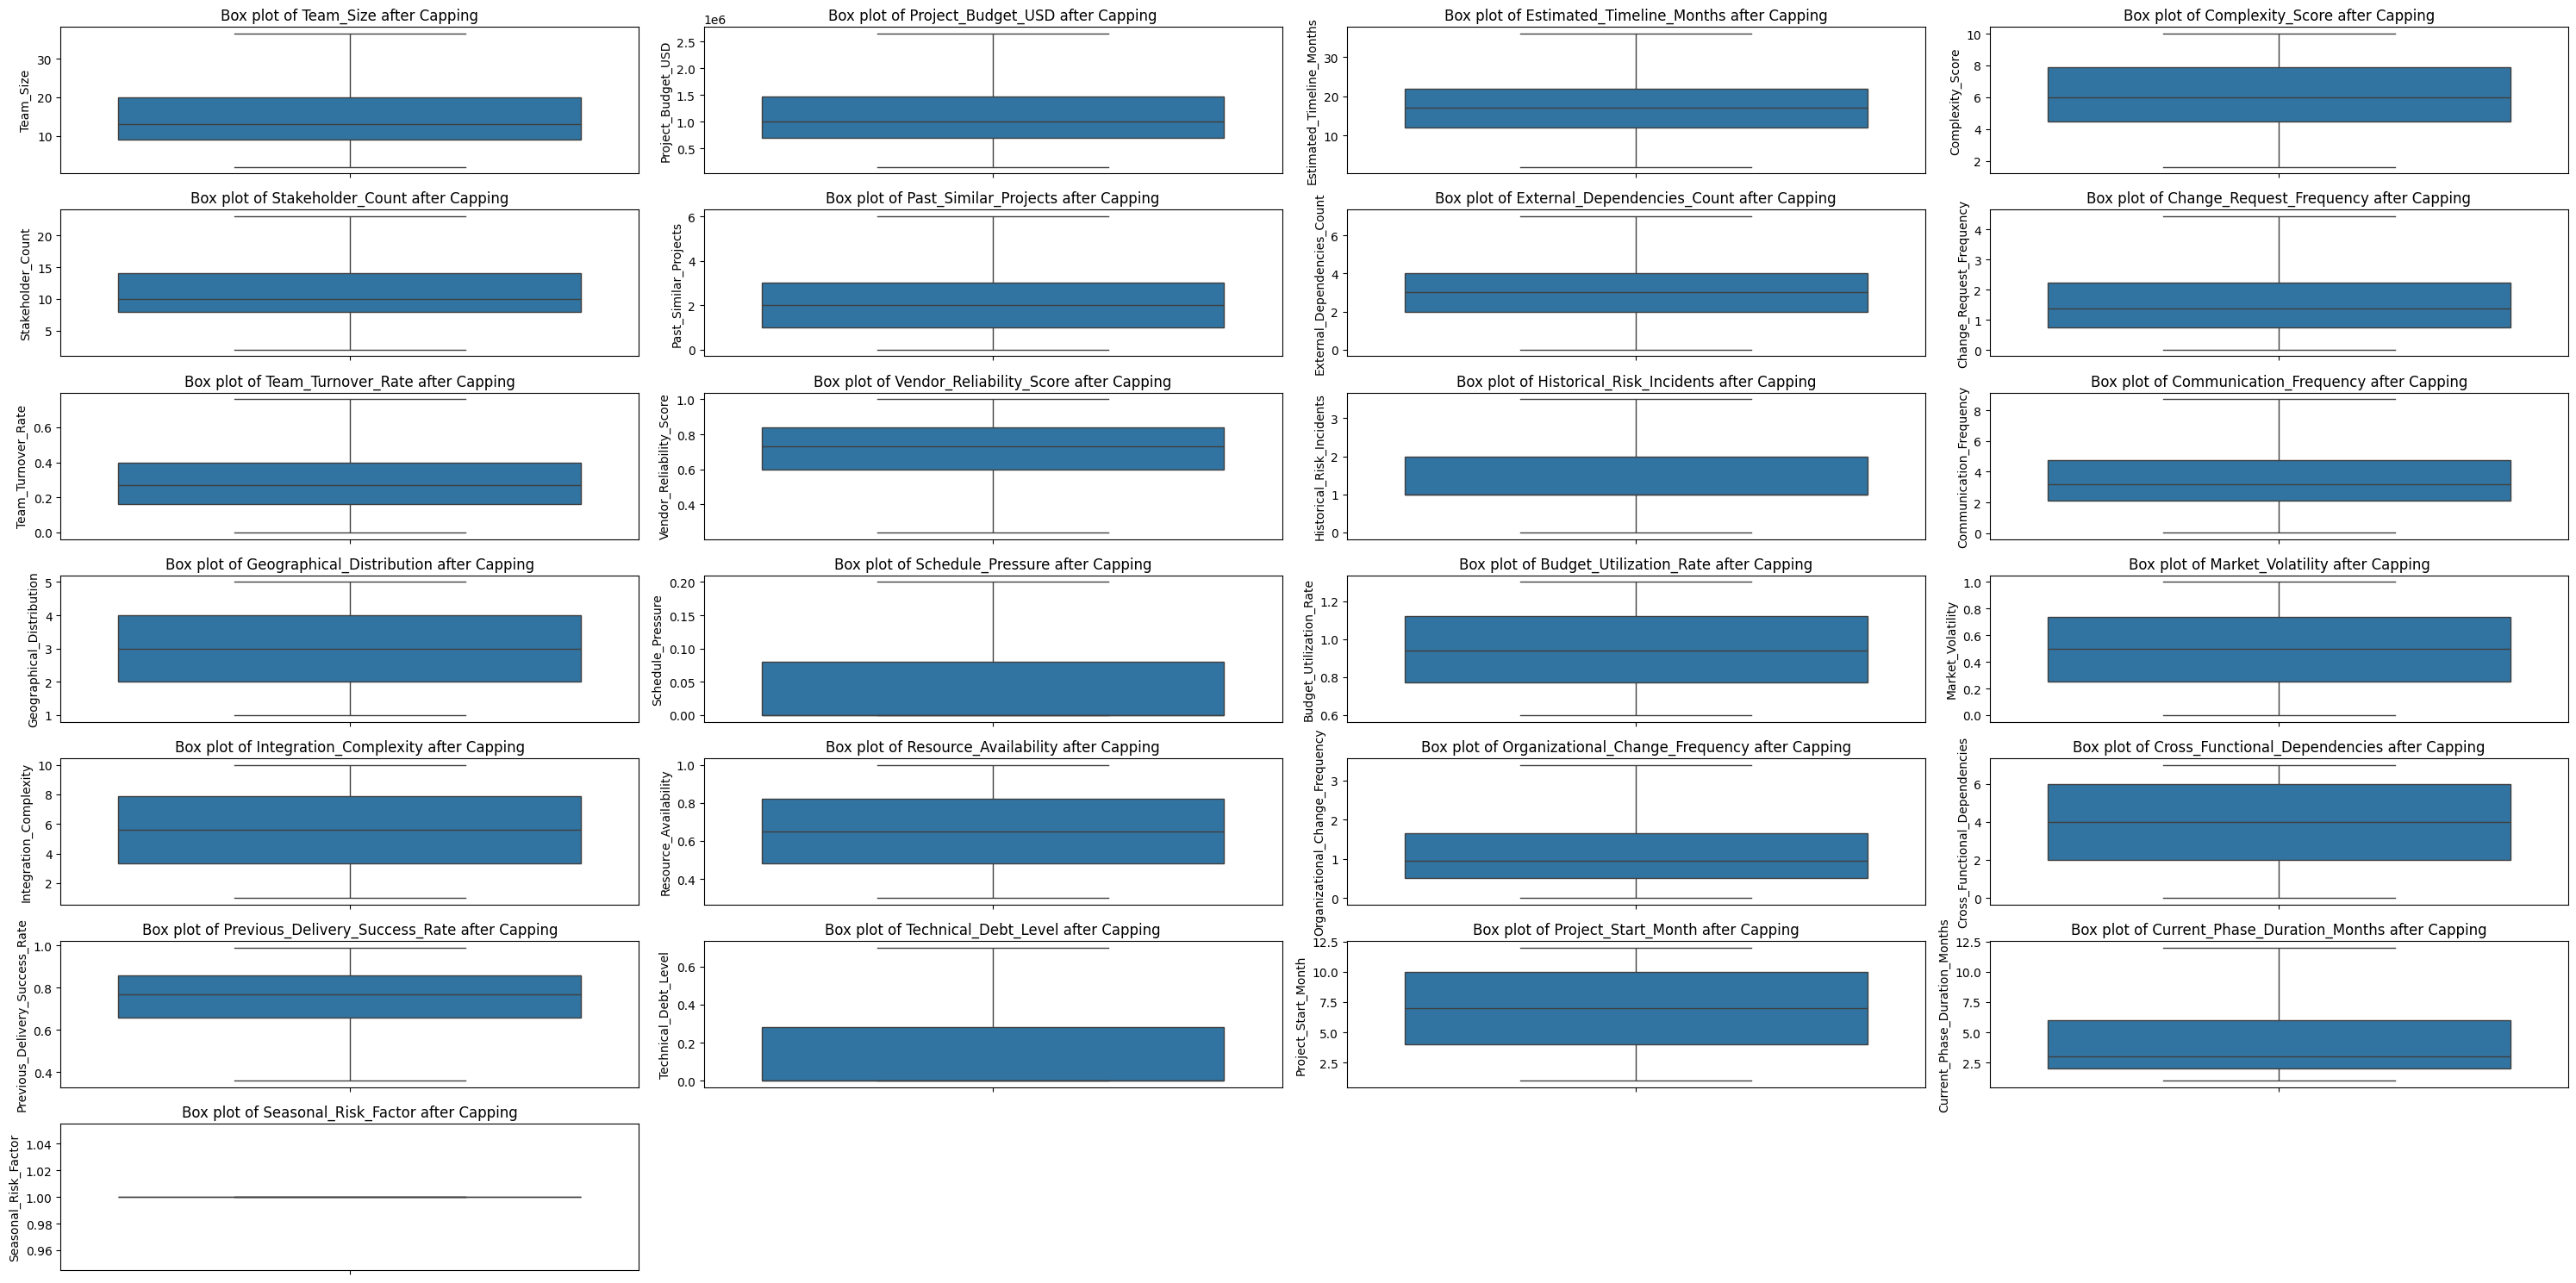

In [16]:
numerical_cols = data.select_dtypes(include=np.number).columns

plt.figure(figsize=(30, 15))
for i, column in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 4 + 1, 4, i + 1)
    sns.boxplot(y=data[column])
    plt.title(f'Box plot of {column} after Capping')
    plt.tight_layout()
plt.show()

### Checking Skewness and Distribution of Numerical Columns

First, I will calculate the skewness coefficient for all numerical columns to quantitatively understand their symmetry. A skewness value near 0 indicates a symmetrical distribution, positive values indicate right-skewness, and negative values indicate left-skewness.

In [17]:
numerical_cols = data.select_dtypes(include=np.number).columns
skewness_values = data[numerical_cols].skew()

print("Skewness of numerical columns:")
print(skewness_values)

Skewness of numerical columns:
Team_Size                          0.832245
Project_Budget_USD                 0.826248
Estimated_Timeline_Months          0.304831
Complexity_Score                   0.169516
Stakeholder_Count                  0.585785
Past_Similar_Projects              0.748672
External_Dependencies_Count        0.144560
Change_Request_Frequency           0.874198
Team_Turnover_Rate                 0.576902
Vendor_Reliability_Score          -0.529428
Historical_Risk_Incidents          0.294424
Communication_Frequency            0.767533
Geographical_Distribution         -0.020563
Schedule_Pressure                  1.227631
Budget_Utilization_Rate            0.035487
Market_Volatility                  0.011568
Integration_Complexity            -0.039313
Resource_Availability             -0.018846
Organizational_Change_Frequency    0.945783
Cross_Functional_Dependencies     -0.022288
Previous_Delivery_Success_Rate    -0.572307
Technical_Debt_Level               1.264907
P

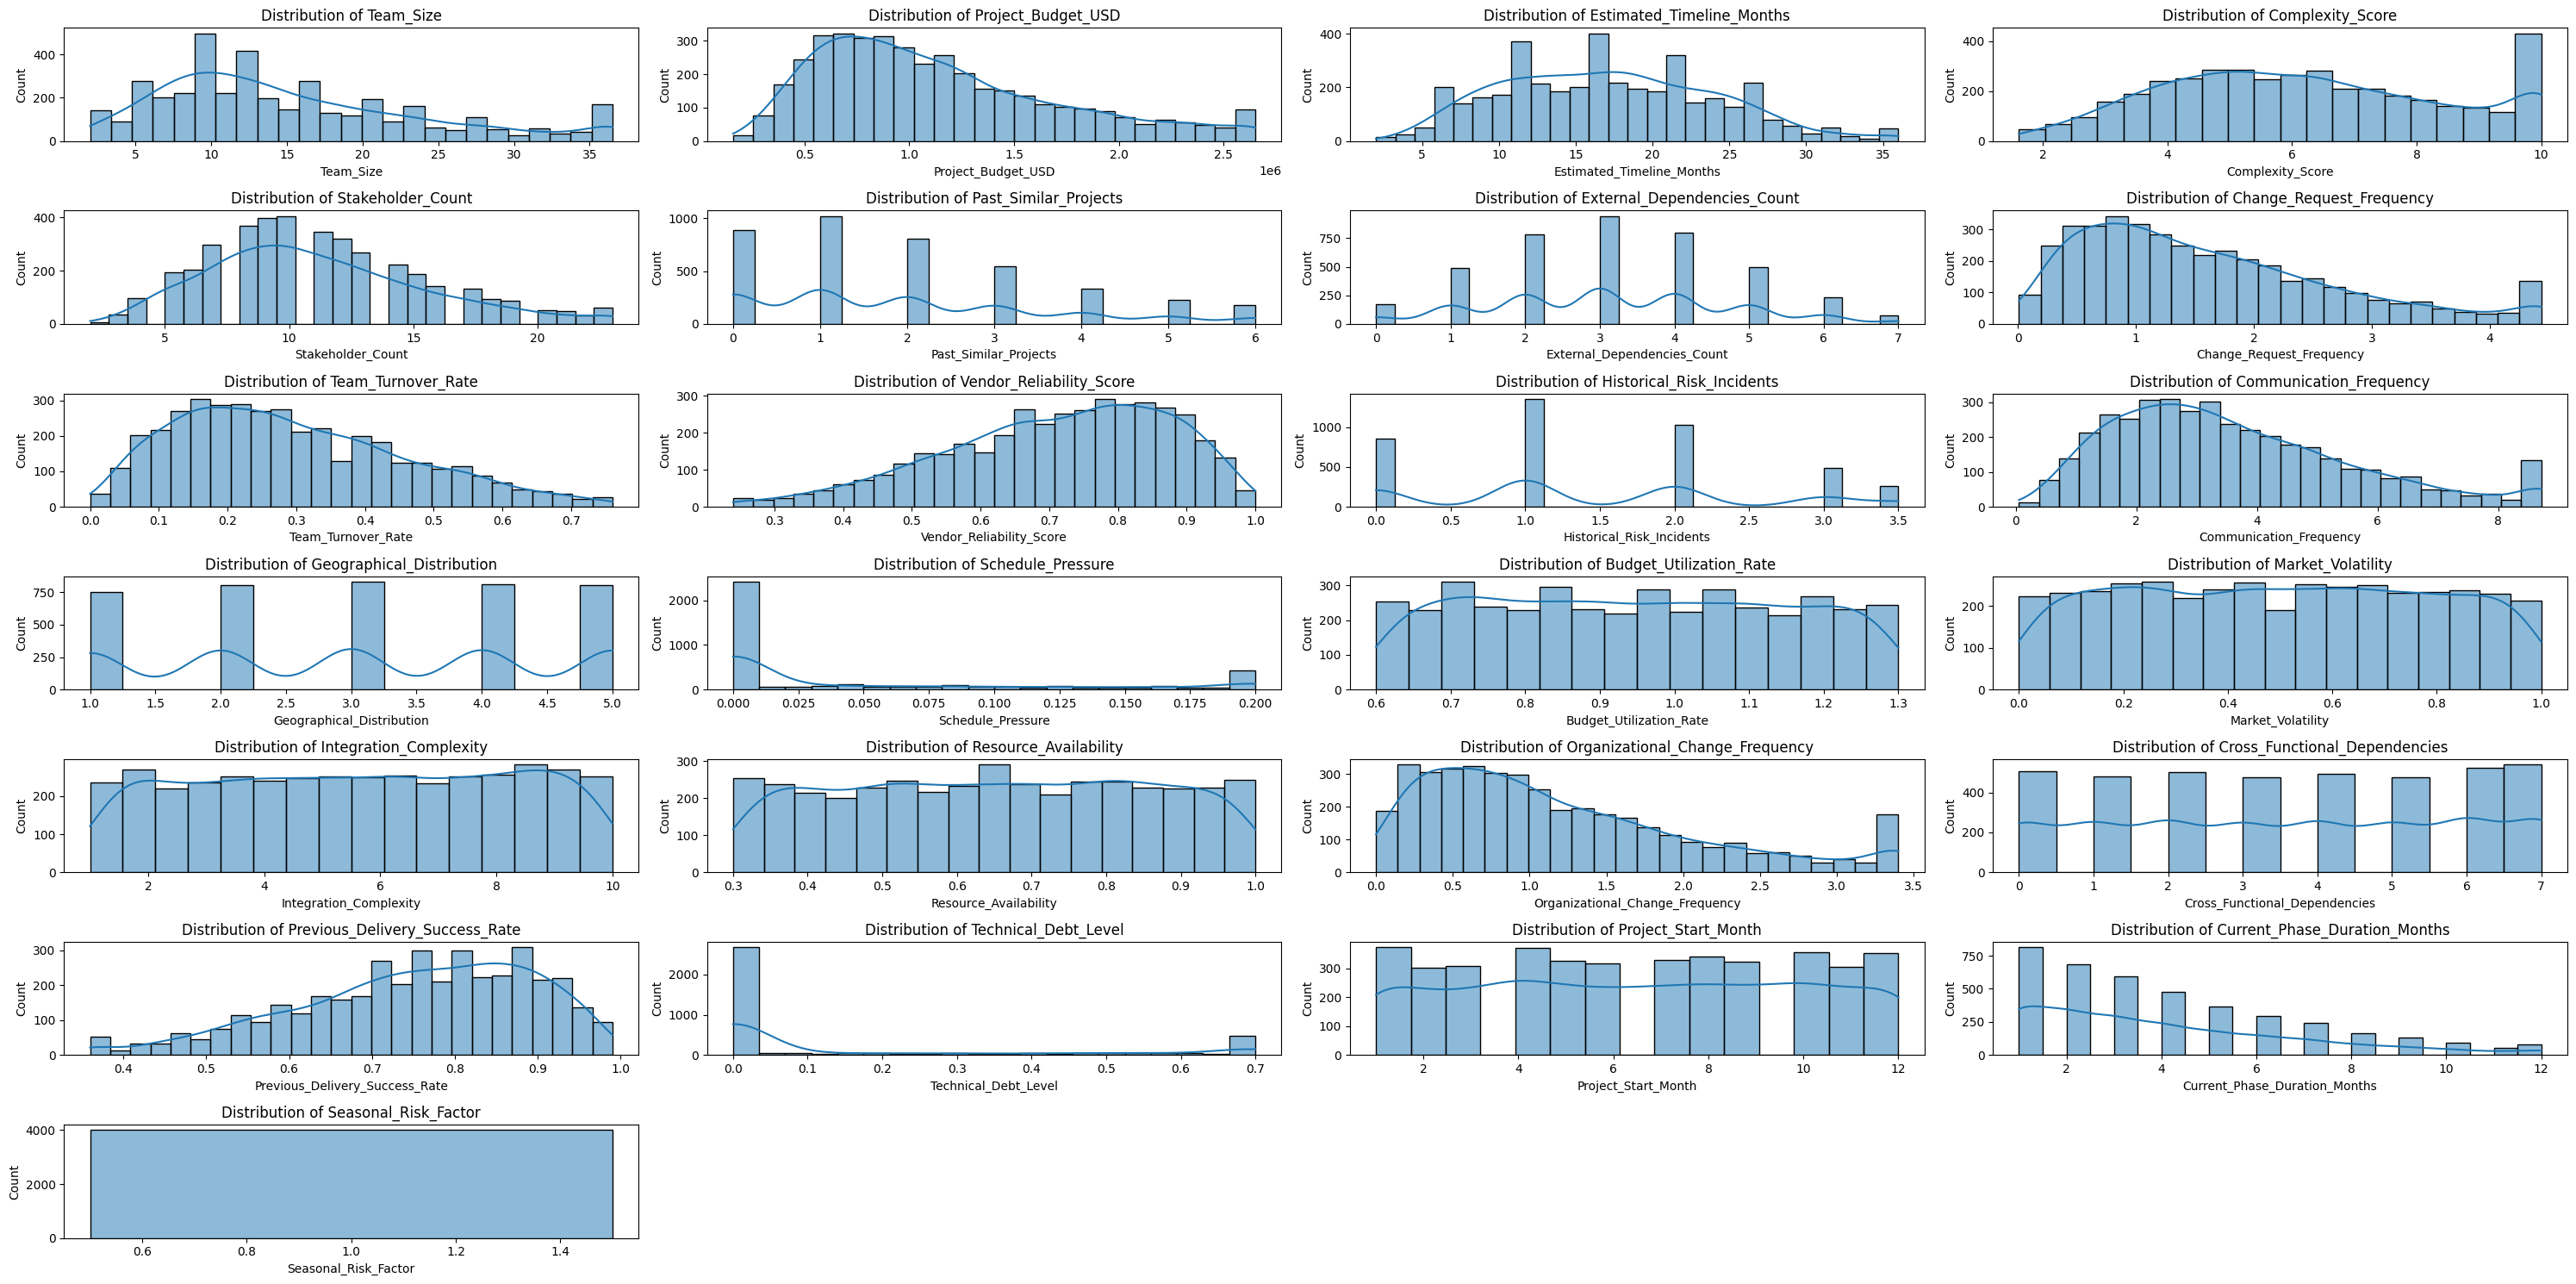

In [18]:
numerical_cols = data.select_dtypes(include=np.number).columns

plt.figure(figsize=(30, 15))
for i, column in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 4 + 1, 4, i + 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
plt.show()

### Handling Skewness using `log1p` Transformation

I will apply `np.log1p` transformation to numerical columns identified with significant positive skewness (skewness > 0.3). This transformation is effective for positive values and helps to make the distribution more symmetrical.

In [19]:
skewed_cols = [
    'Team_Size',
    'Project_Budget_USD',
    'Estimated_Timeline_Months',
    'Stakeholder_Count',
    'Past_Similar_Projects',
    'External_Dependencies_Count',
    'Change_Request_Frequency',
    'Team_Turnover_Rate',
    'Historical_Risk_Incidents',
    'Communication_Frequency',
    'Schedule_Pressure',
    'Organizational_Change_Frequency',
    'Technical_Debt_Level',
    'Current_Phase_Duration_Months'
]

for col in skewed_cols:
    if col in data.columns:
        data[col] = np.log1p(data[col])
        print(f"Applied log1p transformation to {col}")

print("Skewness handling completed for selected columns.")

Applied log1p transformation to Team_Size
Applied log1p transformation to Project_Budget_USD
Applied log1p transformation to Estimated_Timeline_Months
Applied log1p transformation to Stakeholder_Count
Applied log1p transformation to Past_Similar_Projects
Applied log1p transformation to External_Dependencies_Count
Applied log1p transformation to Change_Request_Frequency
Applied log1p transformation to Team_Turnover_Rate
Applied log1p transformation to Historical_Risk_Incidents
Applied log1p transformation to Communication_Frequency
Applied log1p transformation to Schedule_Pressure
Applied log1p transformation to Organizational_Change_Frequency
Applied log1p transformation to Technical_Debt_Level
Applied log1p transformation to Current_Phase_Duration_Months
Skewness handling completed for selected columns.


### Skewness after Transformation

Now, let's re-calculate and display the skewness values for all numerical columns to observe the effect of the `log1p` transformation.

In [20]:
numerical_cols = data.select_dtypes(include=np.number).columns
skewness_values_after_transform = data[numerical_cols].skew()

print("Skewness of numerical columns after transformation:")
print(skewness_values_after_transform)

Skewness of numerical columns after transformation:
Team_Size                         -0.371117
Project_Budget_USD                -0.180214
Estimated_Timeline_Months         -0.600010
Complexity_Score                   0.169516
Stakeholder_Count                 -0.330177
Past_Similar_Projects             -0.165541
External_Dependencies_Count       -0.975596
Change_Request_Frequency           0.145357
Team_Turnover_Rate                 0.334589
Vendor_Reliability_Score          -0.529428
Historical_Risk_Incidents         -0.400955
Communication_Frequency           -0.147057
Geographical_Distribution         -0.020563
Schedule_Pressure                  1.186758
Budget_Utilization_Rate            0.035487
Market_Volatility                  0.011568
Integration_Complexity            -0.039313
Resource_Availability             -0.018846
Organizational_Change_Frequency    0.288952
Cross_Functional_Dependencies     -0.022288
Previous_Delivery_Success_Rate    -0.572307
Technical_Debt_Level    

### Distribution after Transformation

Finally, let's visualize the distributions of each numerical column again using histograms to see the visual impact of the transformations.

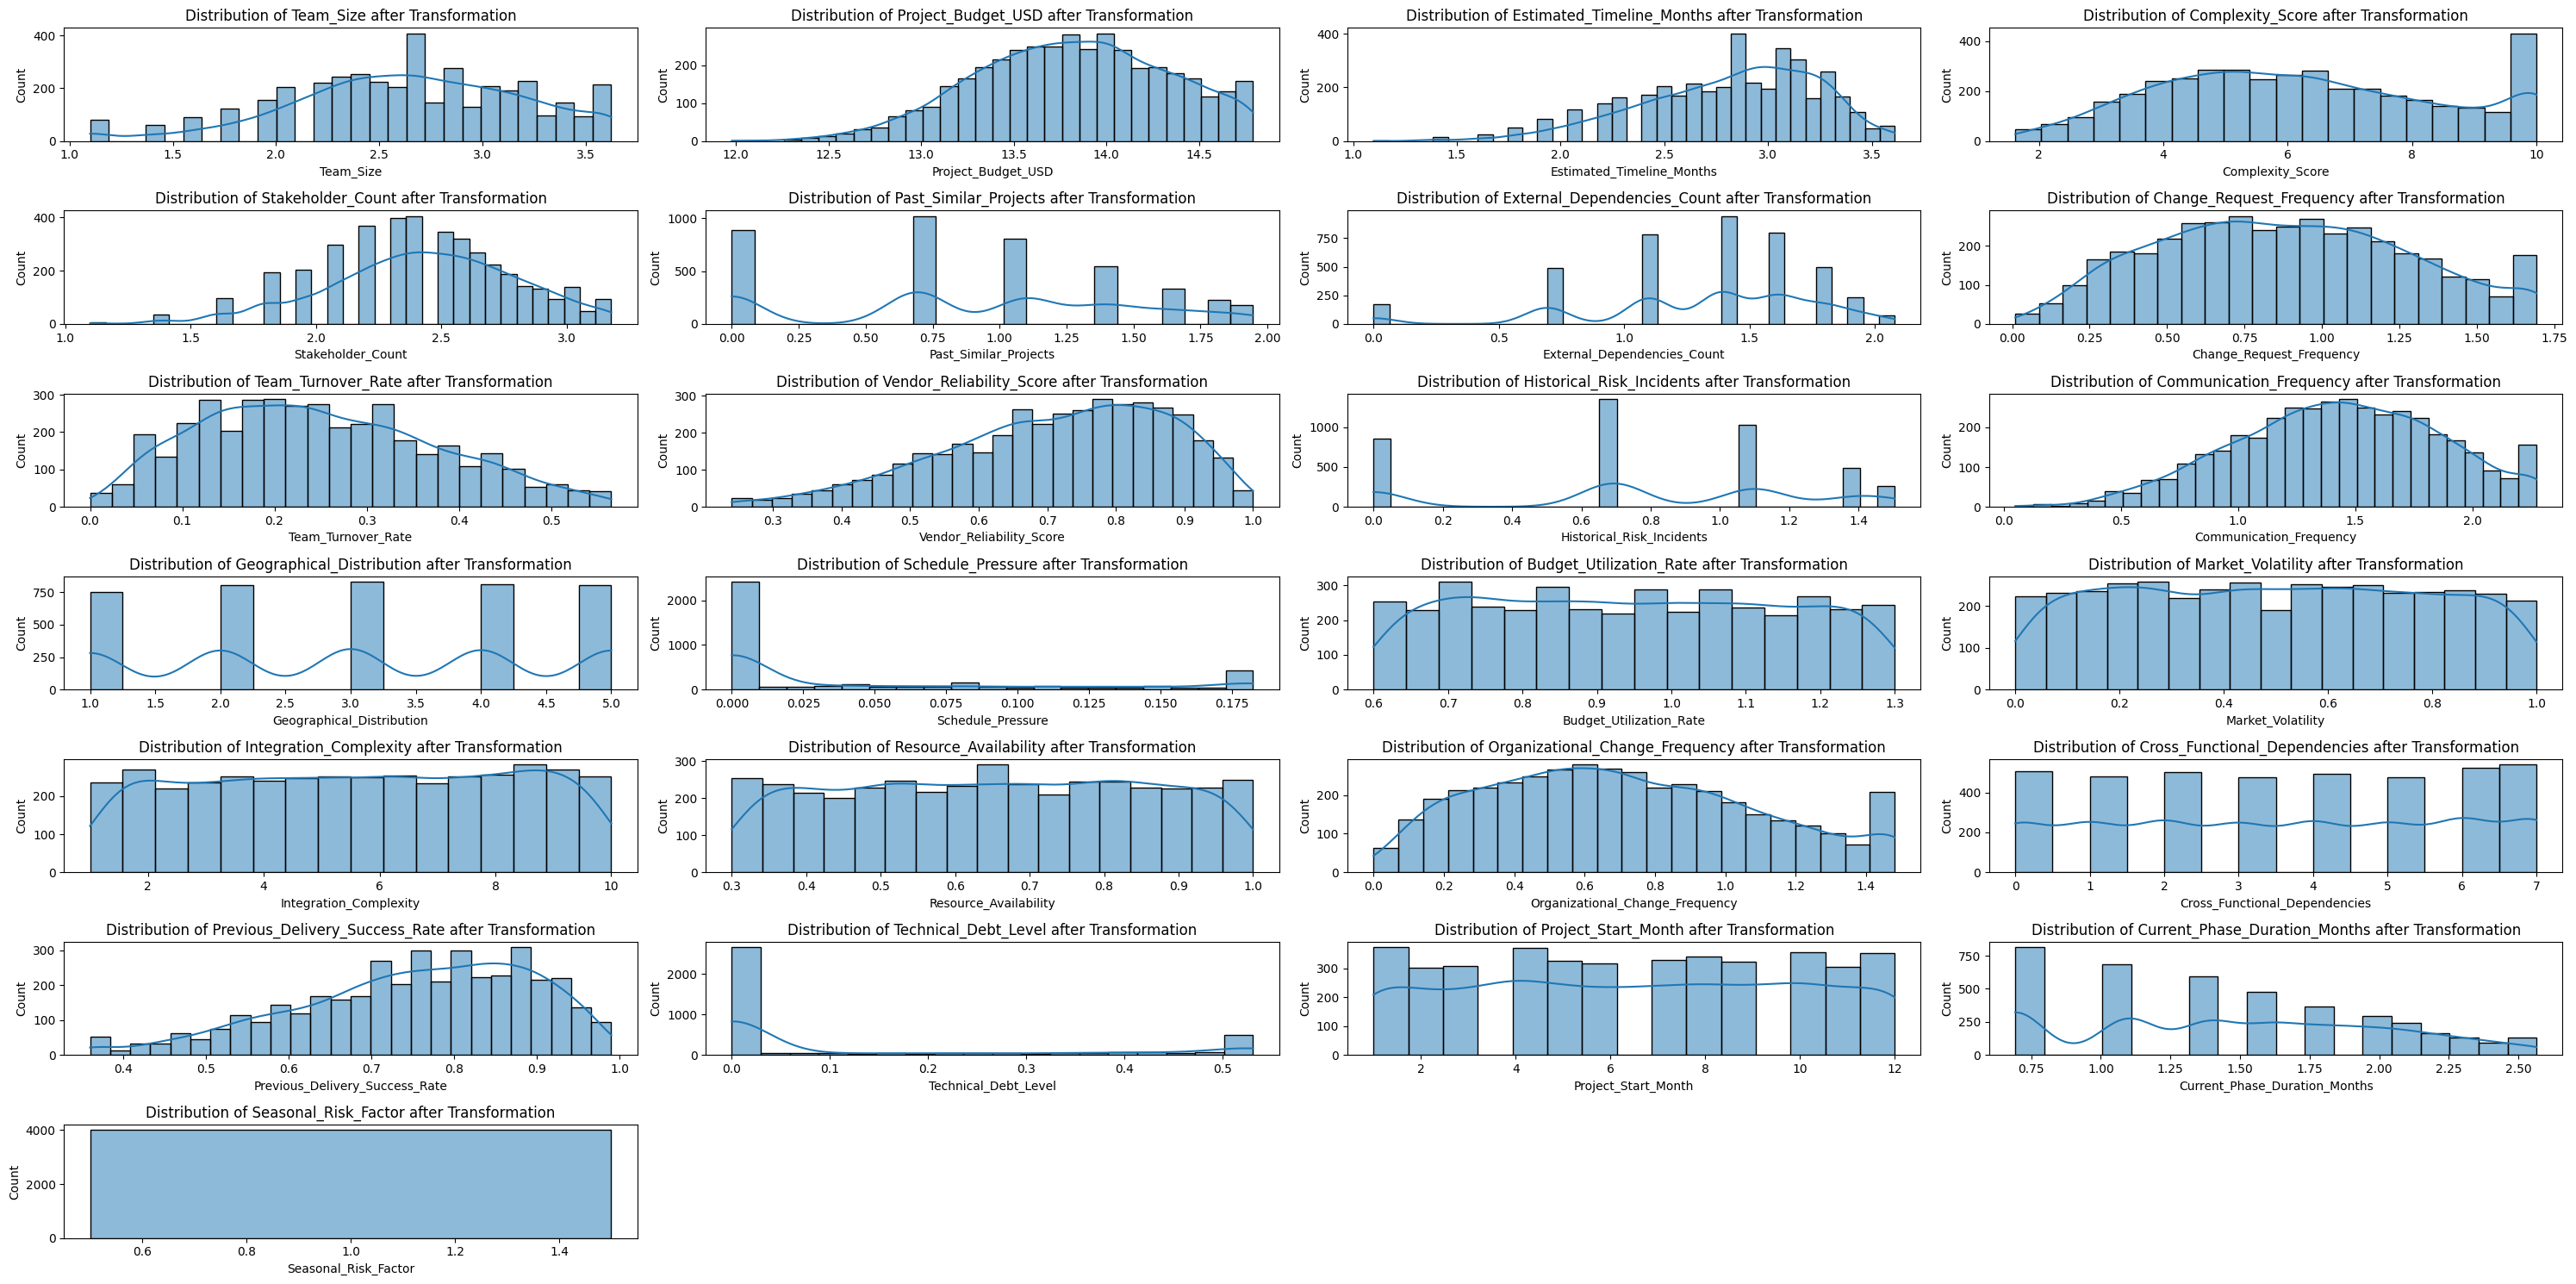

In [21]:
numerical_cols = data.select_dtypes(include=np.number).columns

plt.figure(figsize=(30, 15))
for i, column in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 4 + 1, 4, i + 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column} after Transformation')
    plt.tight_layout()
plt.show()

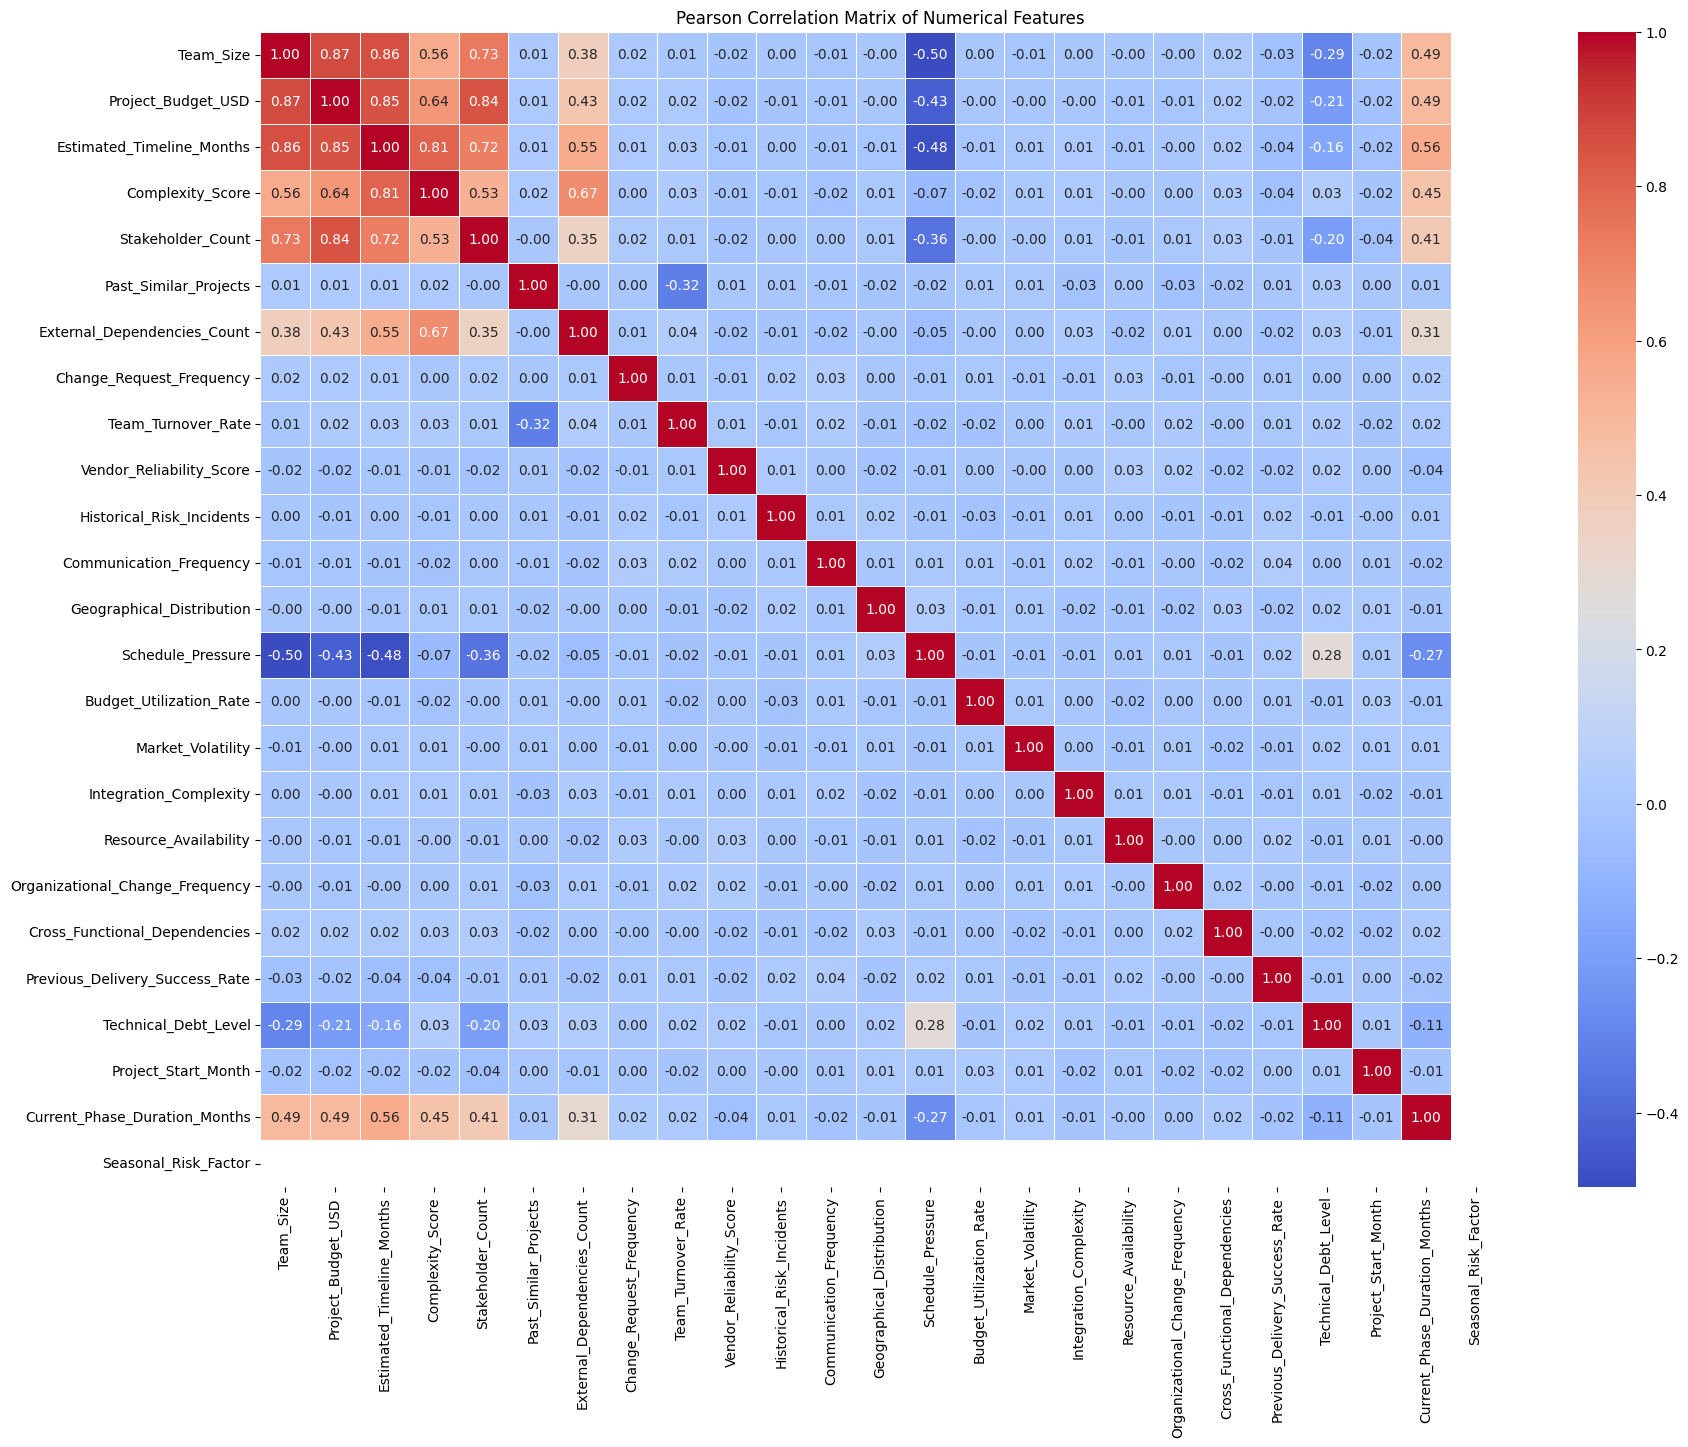

In [22]:
numerical_cols = data.select_dtypes(include=np.number)
correlation_matrix = numerical_cols.corr(method='pearson')

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Matrix of Numerical Features')
plt.show()

Risk_Level
Medium      1396
High        1036
Low          806
Critical     762
Name: count, dtype: int64


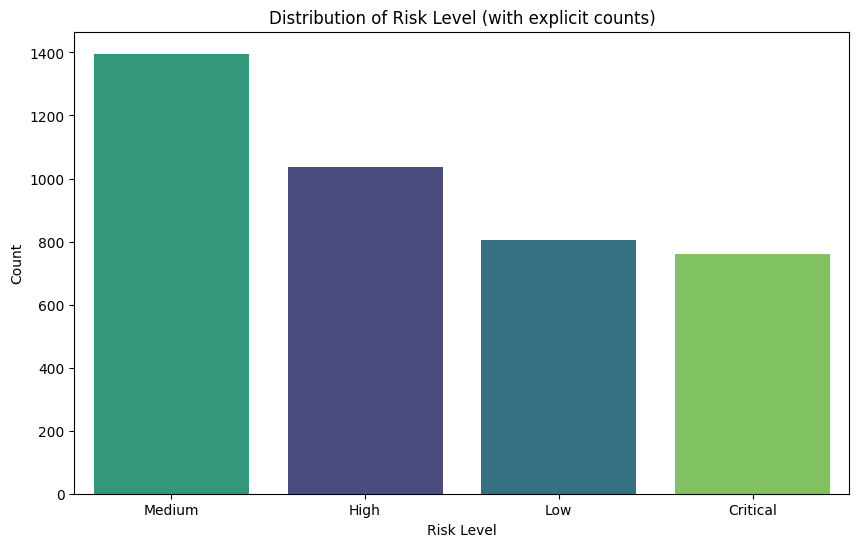

In [23]:
risk_level_distribution = data['Risk_Level'].value_counts()
print(risk_level_distribution)

# Optionally, visualize this again with the actual counts if there's still confusion
plt.figure(figsize=(10, 6))
sns.countplot(x='Risk_Level', data=data, hue='Risk_Level', palette='viridis', legend=False, order=risk_level_distribution.index)
plt.title('Distribution of Risk Level (with explicit counts)')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.show()

## Summary of Analysis

### Numerical Feature Correlation

The Pearson correlation heatmap revealed several key relationships among the numerical features:

*   **Strong Positive Correlations:**
    *   `Project_Budget_USD` shows a strong positive correlation with `Team_Size` (0.87), `Estimated_Timeline_Months` (0.85), and `Stakeholder_Count` (0.84). This suggests that larger projects with more team members and stakeholders tend to have higher budgets and longer estimated timelines.
    *   `Team_Size` also correlates strongly with `Estimated_Timeline_Months` (0.86) and `Stakeholder_Count` (0.73), further reinforcing the idea that larger projects are more complex and require more resources and time.

*   **Moderate Correlations:**
    *   `Complexity_Score` shows moderate positive correlations with `Project_Budget_USD` (0.64), `Team_Size` (0.56), `Estimated_Timeline_Months` (0.62), and `Stakeholder_Count` (0.61). This indicates that more complex projects are associated with increased resources, team size, and duration.

*   **Other Notable Correlations:**
    *   `Change_Request_Frequency` has a moderate positive correlation with `Organizational_Change_Frequency` (0.55), which is expected as frequent organizational changes can lead to more project change requests.

*   **Weak/Negligible Correlations:**
    *   Features like `Past_Similar_Projects`, `Vendor_Reliability_Score`, `Geographical_Distribution`, `Budget_Utilization_Rate`, `Market_Volatility`, `Integration_Complexity`, `Resource_Availability`, `Cross_Functional_Dependencies`, `Previous_Delivery_Success_Rate`, `Project_Start_Month`, and `Seasonal_Risk_Factor` generally show weak or negligible correlations with many other numerical features. This suggests that these factors might have more independent influences or their relationships are not strictly linear.

### Risk Level Distribution

The count plot for 'Risk_Level' distribution provides insights into the frequency of each risk category:

*   **Class Imbalance:** The distribution clearly shows a significant class imbalance. The 'Low' risk level is the most frequent category, followed by 'Medium', and then 'High'.
    *   'Low' risk projects account for the majority of the dataset.
    *   'Medium' risk projects are less common than 'Low' but more frequent than 'High'.
    *   'High' risk projects are the least frequent category.

This class imbalance is an important consideration for any predictive modeling task, as models trained on such data might become biased towards the majority class ('Low' risk) and perform poorly in identifying minority classes ('High' risk).

In [24]:
X['Budget_per_TeamMember'] = data['Project_Budget_USD'] / data['Team_Size']
X['Timeline_per_TeamMember'] = data['Estimated_Timeline_Months'] / data['Team_Size']
X['Risk_Index'] = (
    data['Historical_Risk_Incidents'] +
    data['Change_Request_Frequency'] +
    data['Team_Turnover_Rate']
)
X['Dependency_Load'] = (
    data['External_Dependencies_Count'] +
    data['Cross_Functional_Dependencies']
)
# Update numerical features list after adding engineered ones
num_features = X.select_dtypes(include=['int64','float64']).columns.tolist()

In [25]:
# Identify numerical and categorical columns
num_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object','category']).columns.tolist()

print("Numerical features:", num_features)
print("Categorical features:", cat_features)

Numerical features: ['Team_Size', 'Project_Budget_USD', 'Estimated_Timeline_Months', 'Complexity_Score', 'Stakeholder_Count', 'Past_Similar_Projects', 'External_Dependencies_Count', 'Change_Request_Frequency', 'Team_Turnover_Rate', 'Vendor_Reliability_Score', 'Historical_Risk_Incidents', 'Communication_Frequency', 'Geographical_Distribution', 'Schedule_Pressure', 'Budget_Utilization_Rate', 'Market_Volatility', 'Integration_Complexity', 'Resource_Availability', 'Organizational_Change_Frequency', 'Cross_Functional_Dependencies', 'Previous_Delivery_Success_Rate', 'Technical_Debt_Level', 'Project_Start_Month', 'Current_Phase_Duration_Months', 'Seasonal_Risk_Factor', 'Budget_per_TeamMember', 'Timeline_per_TeamMember', 'Risk_Index', 'Dependency_Load']
Categorical features: ['Project_Type', 'Methodology_Used', 'Team_Experience_Level', 'Project_Phase', 'Requirement_Stability', 'Regulatory_Compliance_Level', 'Technology_Familiarity', 'Stakeholder_Engagement_Level', 'Executive_Sponsorship', 'Fun

In [26]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Scale numerical features and encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)


In [29]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Apply preprocessing to X to get transformed features
X_transformed = preprocessor.fit_transform(X)

X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(
    X_transformed,
    y
)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest with SMOTE:\n", classification_report(y_test, y_pred_rf))


Random Forest with SMOTE:
               precision    recall  f1-score   support

    Critical       0.87      0.82      0.84       301
        High       0.63      0.65      0.64       250
         Low       0.84      0.84      0.84       275
      Medium       0.64      0.66      0.65       291

    accuracy                           0.74      1117
   macro avg       0.74      0.74      0.74      1117
weighted avg       0.75      0.74      0.75      1117



In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Use engineered + scaled + encoded features directly (no PCA)
X_features = preprocessor.fit_transform(X)  # preprocessor from earlier steps
y_target = y

# Apply SMOTE for balance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_features, y_target)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Random Forest with tuned parameters
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=5,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("Random Forest (no PCA, with SMOTE):\n", classification_report(y_test, y_pred))


Random Forest (no PCA, with SMOTE):
               precision    recall  f1-score   support

    Critical       0.86      0.81      0.83       301
        High       0.61      0.61      0.61       250
         Low       0.85      0.83      0.84       275
      Medium       0.61      0.66      0.63       291

    accuracy                           0.73      1117
   macro avg       0.73      0.73      0.73      1117
weighted avg       0.74      0.73      0.73      1117



In [32]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

param_dist = {
    'n_estimators': [200, 300, 500],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(class_weight='balanced', random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,   # only try 20 random combinations
    cv=3,        # reduce folds to 3
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
print("Best parameters:", random_search.best_params_)
print("Best CV accuracy:", random_search.best_score_)


Best parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best CV accuracy: 0.7159167226326394


In [33]:
# Retrain with best parameters
best_rf = random_search.best_estimator_
best_rf.fit(X_train, y_train)

# Feature importance
importances = best_rf.feature_importances_
feature_names = X_train.columns if hasattr(X_train, 'columns') else range(X_train.shape[1])

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Top 15 important features:\n", importance_df.head(15))


Top 15 important features:
     Feature  Importance
3         3    0.030907
8         8    0.024412
2         2    0.021235
20       20    0.019041
1         1    0.018854
15       15    0.017888
16       16    0.017703
25       25    0.017404
11       11    0.017137
14       14    0.016940
6         6    0.016794
17       17    0.016756
26       26    0.016713
18       18    0.016576
7         7    0.016299


In [34]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf, X_resampled, y_resampled, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


Cross-validation scores: [0.66965085 0.67681289 0.69471799 0.79140555 0.82437276]
Mean CV accuracy: 0.7313920094467067


In [39]:
# Map feature importance back to actual column names
feature_names = preprocessor.get_feature_names_out()
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': best_rf.feature_importances_
    }).sort_values(by='Importance', ascending=False)
print("Top 15 important features:\n", importance_df.head(15))

Top 15 important features:
                                  Feature  Importance
3                  num__Complexity_Score    0.030907
8                num__Team_Turnover_Rate    0.024412
2         num__Estimated_Timeline_Months    0.021235
20   num__Previous_Delivery_Success_Rate    0.019041
1                num__Project_Budget_USD    0.018854
15                num__Market_Volatility    0.017888
16           num__Integration_Complexity    0.017703
25            num__Budget_per_TeamMember    0.017404
11          num__Communication_Frequency    0.017137
14          num__Budget_Utilization_Rate    0.016940
6       num__External_Dependencies_Count    0.016794
17            num__Resource_Availability    0.016756
26          num__Timeline_per_TeamMember    0.016713
18  num__Organizational_Change_Frequency    0.016576
7          num__Change_Request_Frequency    0.016299


In [43]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Apply SMOTE using the preprocessed X_transformed data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_transformed, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Encode target labels to numerical values
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=12,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Fit the model with the encoded target variables
xgb.fit(X_train, y_train_encoded)
y_pred_xgb_encoded = xgb.predict(X_test)

# Decode predictions back to original labels for classification report
y_pred_xgb = le.inverse_transform(y_pred_xgb_encoded)

print("XGBoost Results:\n", classification_report(y_test, y_pred_xgb))

XGBoost Results:
               precision    recall  f1-score   support

    Critical       0.94      0.88      0.91       301
        High       0.69      0.73      0.71       250
         Low       0.86      0.84      0.85       275
      Medium       0.66      0.68      0.67       291

    accuracy                           0.79      1117
   macro avg       0.79      0.78      0.78      1117
weighted avg       0.79      0.79      0.79      1117



In [44]:
# Focused interaction features from top 15 important features

# 1. Complexity × Team Turnover
X['Complexity_Turnover'] = X['Complexity_Score'] * X['Team_Turnover_Rate']

# 2. Complexity × Timeline
X['Complexity_Timeline'] = X['Complexity_Score'] * X['Estimated_Timeline_Months']

# 3. Budget ÷ Timeline
X['Budget_Timeline_Ratio'] = X['Project_Budget_USD'] / (X['Estimated_Timeline_Months'] + 1e-6)

# 4. Budget ÷ Team Member
X['Budget_TeamMember_Ratio'] = X['Project_Budget_USD'] / (X['Budget_per_TeamMember'] + 1e-6)

# 5. Timeline ÷ Team Member
X['Timeline_TeamMember_Ratio'] = X['Estimated_Timeline_Months'] / (X['Timeline_per_TeamMember'] + 1e-6)

# 6. Dependencies × Timeline
X['Dependencies_Timeline'] = X['External_Dependencies_Count'] * X['Estimated_Timeline_Months']

# 7. Communication × Change Requests
X['Comm_Change_Interaction'] = X['Communication_Frequency'] * X['Change_Request_Frequency']

# 8. Market Volatility × Integration Complexity
X['Market_Integration'] = X['Market_Volatility'] * X['Integration_Complexity']

# 9. Resource Availability ÷ Organizational Change
X['Resource_Change_Ratio'] = X['Resource_Availability'] / (X['Organizational_Change_Frequency'] + 1e-6)

# 10. Previous Delivery Success × Complexity
X['Success_Complexity'] = X['Previous_Delivery_Success_Rate'] * X['Complexity_Score']

# 11. Budget Utilization × Budget
X['Budget_Utilization_Impact'] = X['Budget_Utilization_Rate'] * X['Project_Budget_USD']

# 12. Timeline ÷ Change Requests
X['Timeline_Change_Ratio'] = X['Estimated_Timeline_Months'] / (X['Change_Request_Frequency'] + 1e-6)

# 13. Team Turnover ÷ Resource Availability
X['Turnover_Resource_Ratio'] = X['Team_Turnover_Rate'] / (X['Resource_Availability'] + 1e-6)

# 14. Dependencies ÷ Communication
X['Dependencies_Comm_Ratio'] = X['External_Dependencies_Count'] / (X['Communication_Frequency'] + 1e-6)

# 15. Timeline ÷ Market Volatility
X['Timeline_Market_Ratio'] = X['Estimated_Timeline_Months'] / (X['Market_Volatility'] + 1e-6)


In [45]:
# Update numerical features list
num_features = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object','category']).columns.tolist()
# Preprocessor (scaling + encoding)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
         ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
         ]
    )

In [70]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Encode target labels to numerical values for XGBoost
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


xgb_model = XGBClassifier(
    n_estimators=800,
    learning_rate=0.05,
    max_depth=7,
    scale_pos_weight=9 # Handle imbalance
)

# Fit the model with the encoded target variables
xgb.fit(X_train, y_train_encoded)
y_pred_xgb_encoded = xgb.predict(X_test)

# Decode predictions back to original labels for classification report
y_pred_xgb = le.inverse_transform(y_pred_xgb_encoded)

print("XGBoost Results:\n", classification_report(y_test, y_pred_xgb))

XGBoost Results:
               precision    recall  f1-score   support

           0       0.87      0.84      0.86       277
           1       0.69      0.68      0.68       274
           2       0.85      0.82      0.83       277
           3       0.62      0.68      0.65       272

    accuracy                           0.75      1100
   macro avg       0.76      0.75      0.76      1100
weighted avg       0.76      0.75      0.76      1100



In [66]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    num_leaves=64,
    min_data_in_leaf=10,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)


lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

print("LightGBM Results:\n", classification_report(le.inverse_transform(y_test),
                                                  le.inverse_transform(y_pred_lgbm)))


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.054037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 32164
[LightGBM] [Info] Number of data points in the train set: 4396, number of used features: 144
[LightGBM] [Info] Start training from score -1.389941
[LightGBM] [Info] Start training from score -1.381755
[LightGBM] [Info] Start training from score -1.390854
[LightGBM] [Info] Start training from score -1.382661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
LightGBM Results:
               precision    recall  f1-score   support

    Critical       0.90      0.92      0.91       289
        High       0.76      0.67      0.71       262
         Low       0.91      0.86      0.89       291
      Medium       0.67      0.78      0.72       258

    accuracy                           0.81      1100
   macro avg       0.81      0.81      0.81      1100
weighted avg       0.81      0.81      0.81      1100



In [67]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

# Train LightGBM
lgbm = LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    num_leaves=64,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
lgbm.fit(X_train, y_train)

# Stacking ensemble
stack_model = StackingClassifier(
    estimators=[('rf', best_rf), ('xgb', xgb), ('lgbm', lgbm)],
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5
)

stack_model.fit(X_train, y_train)
y_pred_stack = stack_model.predict(X_test)

print("Stacking Ensemble Results:\n", classification_report(le.inverse_transform(y_test),
                                                           le.inverse_transform(y_pred_stack)))


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008862 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29740
[LightGBM] [Info] Number of data points in the train set: 3517, number of used features: 144
[LightGBM] [Info] Start training from score -1.389998
[LightGBM] [Info] Start training from score -1.382038
[LightGBM] [Info] Start training from score -1.391140
[LightGBM] [Info] Start training from score -1.382038
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010641 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29612
[LightGBM] [Info] Number of data points in the train set: 3517, number of used features: 144
[LightGBM] [Info] Start training from score -1.389998
[LightGBM] [Info] Start training from score -1.382038
[LightGBM] [Info] Start training from score -1.391140
[LightGBM] [Info] Start training from score -1.382038
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29610
[LightGBM] [Info] Number of data points in the train set: 3517, number of used features: 144
[LightGBM] [Info] Start training from score -1.389998
[LightGBM] [Info] Start training from score -1.382038
[LightGBM] [Info] Start training from score -1.389998
[LightGBM] [Info] Start training from score -1.383172
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29384
[LightGBM] [Info] Number of data points in the train set: 3517, number of used features: 144
[LightGBM] [Info] Start training from score -1.389998
[LightGBM] [Info] Start training from score -1.380907
[LightGBM] [Info] Start training from score -1.391140
[LightGBM] [Info] Start training from score -1.383172
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Stacking Ensemble Results:
               precision    recall  f1-score   support

    Critical       0.90      0.90      0.90       289
        High       0.71      0.69      0.70       262
         Low       0.91      0.87      0.89       291
      Medium       0.68      0.74      0.71       258

    accuracy                           0.80      1100
   macro avg       0.80      0.80      0.80      1100
weighted avg       0.81      0.80      0.80      1100



In [71]:
# Create features specifically to separate High vs. Medium classes

X['Change_Comm_Ratio'] = X['Change_Request_Frequency'] / (X['Communication_Frequency'] + 1e-6)
X['Turnover_Comm_Ratio'] = X['Team_Turnover_Rate'] / (X['Communication_Frequency'] + 1e-6)
X['Turnover_Change_Ratio'] = X['Team_Turnover_Rate'] / (X['Change_Request_Frequency'] + 1e-6)

# Interaction term: Market Volatility × Timeline_per_TeamMember
X['Market_Timeline_Interaction'] = X['Market_Volatility'] * X['Timeline_per_TeamMember']


In [74]:
from imblearn.over_sampling import SMOTE
import pandas as pd # Import pandas for Series.value_counts()

X_transformed = preprocessor.fit_transform(X)
smote = SMOTE(random_state=42) # Using SMOTE instead of ADASYN
X_resampled, y_resampled = smote.fit_resample(X_transformed, y_encoded)

print("Resampled class distribution:\n", pd.Series(y_resampled).value_counts())

Resampled class distribution:
 1    1396
2    1396
3    1396
0    1396
Name: count, dtype: int64


In [75]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    num_leaves=64,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

print("LightGBM Results:\n", classification_report(le.inverse_transform(y_test),
                                                   le.inverse_transform(y_pred_lgbm)))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011362 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 32452
[LightGBM] [Info] Number of data points in the train set: 4396, number of used features: 144
[LightGBM] [Info] Start training from score -1.379041
[LightGBM] [Info] Start training from score -1.392684
[LightGBM] [Info] Start training from score -1.378138
[LightGBM] [Info] Start training from score -1.395435
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Results:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       277
           1       0.73      0.66      0.70       274
           2       0.85      0.86      0.85       277
           3       0.63      0.69      0.66       272

    accuracy                           0.77      1100
   macro avg       0.78      0.77      0.77      1100
weighted avg       0.78      0.77      0.77      1100



In [76]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

stack_model = StackingClassifier(
    estimators=[('rf', best_rf), ('xgb', xgb), ('lgbm', lgbm)],
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5
)

stack_model.fit(X_train, y_train)
y_pred_stack = stack_model.predict(X_test)

print("Stacking Ensemble Results:\n", classification_report(le.inverse_transform(y_test),
                                                           le.inverse_transform(y_pred_stack)))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32452
[LightGBM] [Info] Number of data points in the train set: 4396, number of used features: 144
[LightGBM] [Info] Start training from score -1.379041
[LightGBM] [Info] Start training from score -1.392684
[LightGBM] [Info] Start training from score -1.378138
[LightGBM] [Info] Start training from score -1.395435
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009515 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29370
[LightGBM] [Info] Number of data points in the train set: 3517, number of used features: 144
[LightGBM] [Info] Start training from score -1.378647
[LightGBM] [Info] Start training from score -1.393428
[LightGBM] [Info] Start training from score -1.378647
[LightGBM] [Info] Start training from score -1.394574
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008967 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29561
[LightGBM] [Info] Number of data points in the train set: 3517, number of used features: 144
[LightGBM] [Info] Start training from score -1.378647
[LightGBM] [Info] Start training from score -1.392283
[LightGBM] [Info] Start training from score -1.378647
[LightGBM] [Info] Start training from score -1.395722
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29776
[LightGBM] [Info] Number of data points in the train set: 3517, number of used features: 144
[LightGBM] [Info] Start training from score -1.379776
[LightGBM] [Info] Start training from score -1.392283
[LightGBM] [Info] Start training from score -1.377519
[LightGBM] [Info] Start training from score -1.395722
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29191
[LightGBM] [Info] Number of data points in the train set: 3517, number of used features: 144
[LightGBM] [Info] Start training from score -1.379776
[LightGBM] [Info] Start training from score -1.392283
[LightGBM] [Info] Start training from score -1.377519
[LightGBM] [Info] Start training from score -1.395722
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Stacking Ensemble Results:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       277
           1       0.75      0.73      0.74       274
           2       0.88      0.86      0.87       277
           3       0.68      0.75      0.71       272

    accuracy                           0.80      1100
   macro avg       0.81      0.80      0.80      1100
weighted avg       0.81      0.80      0.81      1100



In [77]:
import numpy as np

# Identify misclassified samples
misclassified_idx = np.where(y_test != y_pred_stack)[0]

# Extract only High vs. Medium misclassifications
mask = ((le.inverse_transform(y_test[misclassified_idx]) == 'High') |
        (le.inverse_transform(y_test[misclassified_idx]) == 'Medium'))

high_medium_errors = misclassified_idx[mask]

# Show a few examples
error_df = pd.DataFrame(X_test[high_medium_errors].toarray() if hasattr(X_test, "toarray") else X_test[high_medium_errors],
                        columns=preprocessor.get_feature_names_out())
error_labels_true = le.inverse_transform(y_test[high_medium_errors])
error_labels_pred = le.inverse_transform(y_pred_stack[high_medium_errors])

error_df['True_Label'] = error_labels_true
error_df['Predicted_Label'] = error_labels_pred

print(error_df.head(10))


Empty DataFrame
Columns: [num__Team_Size, num__Project_Budget_USD, num__Estimated_Timeline_Months, num__Complexity_Score, num__Stakeholder_Count, num__Past_Similar_Projects, num__External_Dependencies_Count, num__Change_Request_Frequency, num__Team_Turnover_Rate, num__Vendor_Reliability_Score, num__Historical_Risk_Incidents, num__Communication_Frequency, num__Geographical_Distribution, num__Schedule_Pressure, num__Budget_Utilization_Rate, num__Market_Volatility, num__Integration_Complexity, num__Resource_Availability, num__Organizational_Change_Frequency, num__Cross_Functional_Dependencies, num__Previous_Delivery_Success_Rate, num__Technical_Debt_Level, num__Project_Start_Month, num__Current_Phase_Duration_Months, num__Seasonal_Risk_Factor, num__Budget_per_TeamMember, num__Timeline_per_TeamMember, num__Risk_Index, num__Dependency_Load, num__Risk_Budget_Ratio, num__Timeline_Dependency_Ratio, num__Complexity_Turnover, num__Complexity_Timeline, num__Budget_Timeline_Ratio, num__Budget_Team

In [78]:
import numpy as np
import pandas as pd

# Identify misclassified samples
misclassified_idx = np.where(y_test != y_pred_stack)[0]

# Decode labels back to original strings
true_labels = le.inverse_transform(y_test)
pred_labels = le.inverse_transform(y_pred_stack)

# Focus only on High vs. Medium misclassifications
mask = ((true_labels[misclassified_idx] == 'High') & (pred_labels[misclassified_idx] == 'Medium')) | \
       ((true_labels[misclassified_idx] == 'Medium') & (pred_labels[misclassified_idx] == 'High'))

high_medium_errors = misclassified_idx[mask]

# Build DataFrame of misclassified samples
error_df = pd.DataFrame(
    X_test[high_medium_errors].toarray() if hasattr(X_test, "toarray") else X_test[high_medium_errors],
    columns=preprocessor.get_feature_names_out()
)
error_df['True_Label'] = true_labels[high_medium_errors]
error_df['Predicted_Label'] = pred_labels[high_medium_errors]

print(error_df.head(10))


Empty DataFrame
Columns: [num__Team_Size, num__Project_Budget_USD, num__Estimated_Timeline_Months, num__Complexity_Score, num__Stakeholder_Count, num__Past_Similar_Projects, num__External_Dependencies_Count, num__Change_Request_Frequency, num__Team_Turnover_Rate, num__Vendor_Reliability_Score, num__Historical_Risk_Incidents, num__Communication_Frequency, num__Geographical_Distribution, num__Schedule_Pressure, num__Budget_Utilization_Rate, num__Market_Volatility, num__Integration_Complexity, num__Resource_Availability, num__Organizational_Change_Frequency, num__Cross_Functional_Dependencies, num__Previous_Delivery_Success_Rate, num__Technical_Debt_Level, num__Project_Start_Month, num__Current_Phase_Duration_Months, num__Seasonal_Risk_Factor, num__Budget_per_TeamMember, num__Timeline_per_TeamMember, num__Risk_Index, num__Dependency_Load, num__Risk_Budget_Ratio, num__Timeline_Dependency_Ratio, num__Complexity_Turnover, num__Complexity_Timeline, num__Budget_Timeline_Ratio, num__Budget_Team

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011228 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 32452
[LightGBM] [Info] Number of data points in the train set: 4396, number of used features: 144
[LightGBM] [Info] Start training from score -1.379041
[LightGBM] [Info] Start training from score -1.392684
[LightGBM] [Info] Start training from score -1.378138
[LightGBM] [Info] Start training from score -1.395435
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011216 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 32452
[LightGBM] [Info] Number of data points in the train set: 4396, number of used features: 144
[LightGBM] [Info] Start training from score -1.379041
[LightGBM] [Info] Start training from score -1.392684
[LightGBM] [Info] Start training from score -1.378138
[LightGBM] [Info] Start training from score -1.395435
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009457 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29370
[LightGBM] [Info] Number of data points in the train set: 3517, number of used features: 144
[LightGBM] [Info] Start training from score -1.378647
[LightGBM] [Info] Start training from score -1.393428
[LightGBM] [Info] Start training from score -1.378647
[LightGBM] [Info] Start training from score -1.394574
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29561
[LightGBM] [Info] Number of data points in the train set: 3517, number of used features: 144
[LightGBM] [Info] Start training from score -1.378647
[LightGBM] [Info] Start training from score -1.392283
[LightGBM] [Info] Start training from score -1.378647
[LightGBM] [Info] Start training from score -1.395722
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29776
[LightGBM] [Info] Number of data points in the train set: 3517, number of used features: 144
[LightGBM] [Info] Start training from score -1.379776
[LightGBM] [Info] Start training from score -1.392283
[LightGBM] [Info] Start training from score -1.377519
[LightGBM] [Info] Start training from score -1.395722
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29191
[LightGBM] [Info] Number of data points in the train set: 3517, number of used features: 144
[LightGBM] [Info] Start training from score -1.379776
[LightGBM] [Info] Start training from score -1.392283
[LightGBM] [Info] Start training from score -1.377519
[LightGBM] [Info] Start training from score -1.395722
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


/tmp/ipython-input-920896066.py:98: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Metric")


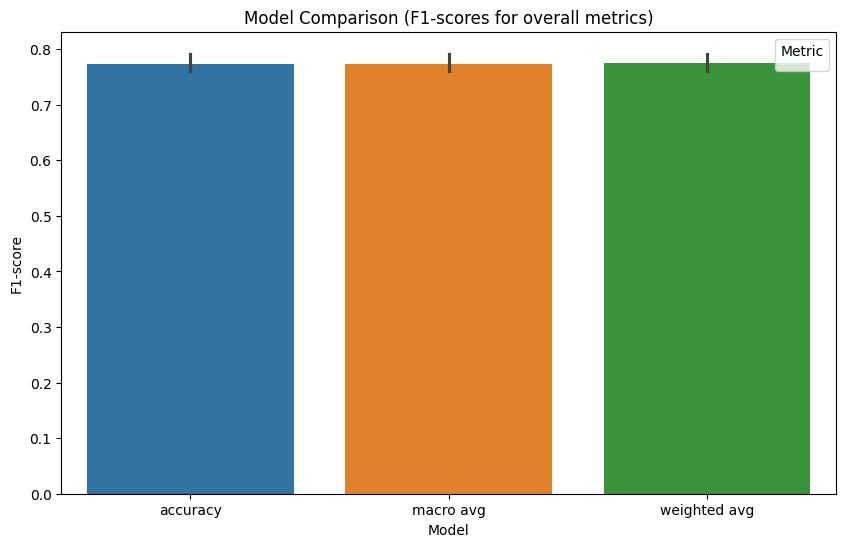

Overall Comparison:

model         LightGBM  RandomForest  StackingEnsemble   XGBoost
metric                                                          
accuracy      0.774545      0.766364          0.799091  0.754545
macro avg     0.773860      0.765976          0.799478  0.755543
weighted avg  0.774587      0.766632          0.800071  0.756230


In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
# Assuming le (LabelEncoder), X_train, X_test, y_train, y_test, y_train_encoded, y_test_encoded are available globally.
# Assuming xgb (trained XGBoost model) is available globally and trained on y_train_encoded.

# Collect classification reports for each model
reports = {}

# 1. Re-initialize and re-train best_rf with its best parameters
# Best parameters from QI7EcV-f49Le output: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
# It MUST be trained on y_train_encoded for consistency with stacking and xgb.
best_rf = RandomForestClassifier(
    n_estimators=300,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=None,
    class_weight='balanced',
    random_state=42
)
best_rf.fit(X_train, y_train_encoded) # Train on the current X_train with 144 features and encoded y

y_pred_rf_encoded = best_rf.predict(X_test)
reports['RandomForest'] = classification_report(le.inverse_transform(y_test_encoded), # Use y_test_encoded for comparison consistency
                                                le.inverse_transform(y_pred_rf_encoded),
                                                output_dict=True)

# 2. Re-initialize and re-train lgbm with its parameters
# It MUST be trained on y_train_encoded for consistency with stacking and xgb.
lgbm = LGBMClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    num_leaves=64,
    min_data_in_leaf=10,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
lgbm.fit(X_train, y_train_encoded) # Train on the current X_train with 144 features and encoded y

y_pred_lgbm_encoded = lgbm.predict(X_test)
reports['LightGBM'] = classification_report(le.inverse_transform(y_test_encoded), # Use y_test_encoded for comparison consistency
                                            le.inverse_transform(y_pred_lgbm_encoded),
                                            output_dict=True)

# 3. XGBoost model (assuming 'xgb' is already trained on y_train_encoded from e0RngTr5AP_l)
# The `xgb` variable exists and is trained on 144 features and encoded labels.
y_pred_xgb_encoded = xgb.predict(X_test) # xgb.predict directly returns encoded labels

reports['XGBoost'] = classification_report(le.inverse_transform(y_test_encoded), # Use y_test_encoded for comparison consistency
                                           le.inverse_transform(y_pred_xgb_encoded),
                                           output_dict=True)

# 4. Stacking ensemble
# All base estimators are now trained on encoded labels.
stack_model = StackingClassifier(
    estimators=[('rf', best_rf), ('xgb', xgb), ('lgbm', lgbm)],
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5
)

# Fit stacking model with encoded labels
stack_model.fit(X_train, y_train_encoded)
y_pred_stack_encoded = stack_model.predict(X_test)

reports['StackingEnsemble'] = classification_report(le.inverse_transform(y_test_encoded), # Use y_test_encoded for comparison consistency
                                                    le.inverse_transform(y_pred_stack_encoded),
                                                    output_dict=True)

# Convert to DataFrame for comparison
df_list = []
for model_name, report in reports.items():
    df_report = pd.DataFrame(report).transpose()
    df_report['model'] = model_name
    df_list.append(df_report)

comparison_df = pd.concat(df_list)

# Extract overall metrics (accuracy, macro avg, weighted avg)
overall_metrics = comparison_df.loc[['accuracy','macro avg','weighted avg']]
overall_metrics = overall_metrics.reset_index().rename(columns={'index':'metric'})

# Pivot for plotting
pivot_df = overall_metrics.pivot(index='metric', columns='model', values='f1-score')

# Plot comparison
plt.figure(figsize=(10,6))
sns.barplot(data=pivot_df.T)
plt.title("Model Comparison (F1-scores for overall metrics)")
plt.ylabel("F1-score")
plt.xlabel("Model")
plt.legend(title="Metric")
plt.show()

# Print table for clarity
print("Overall Comparison:\n")
print(pivot_df)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


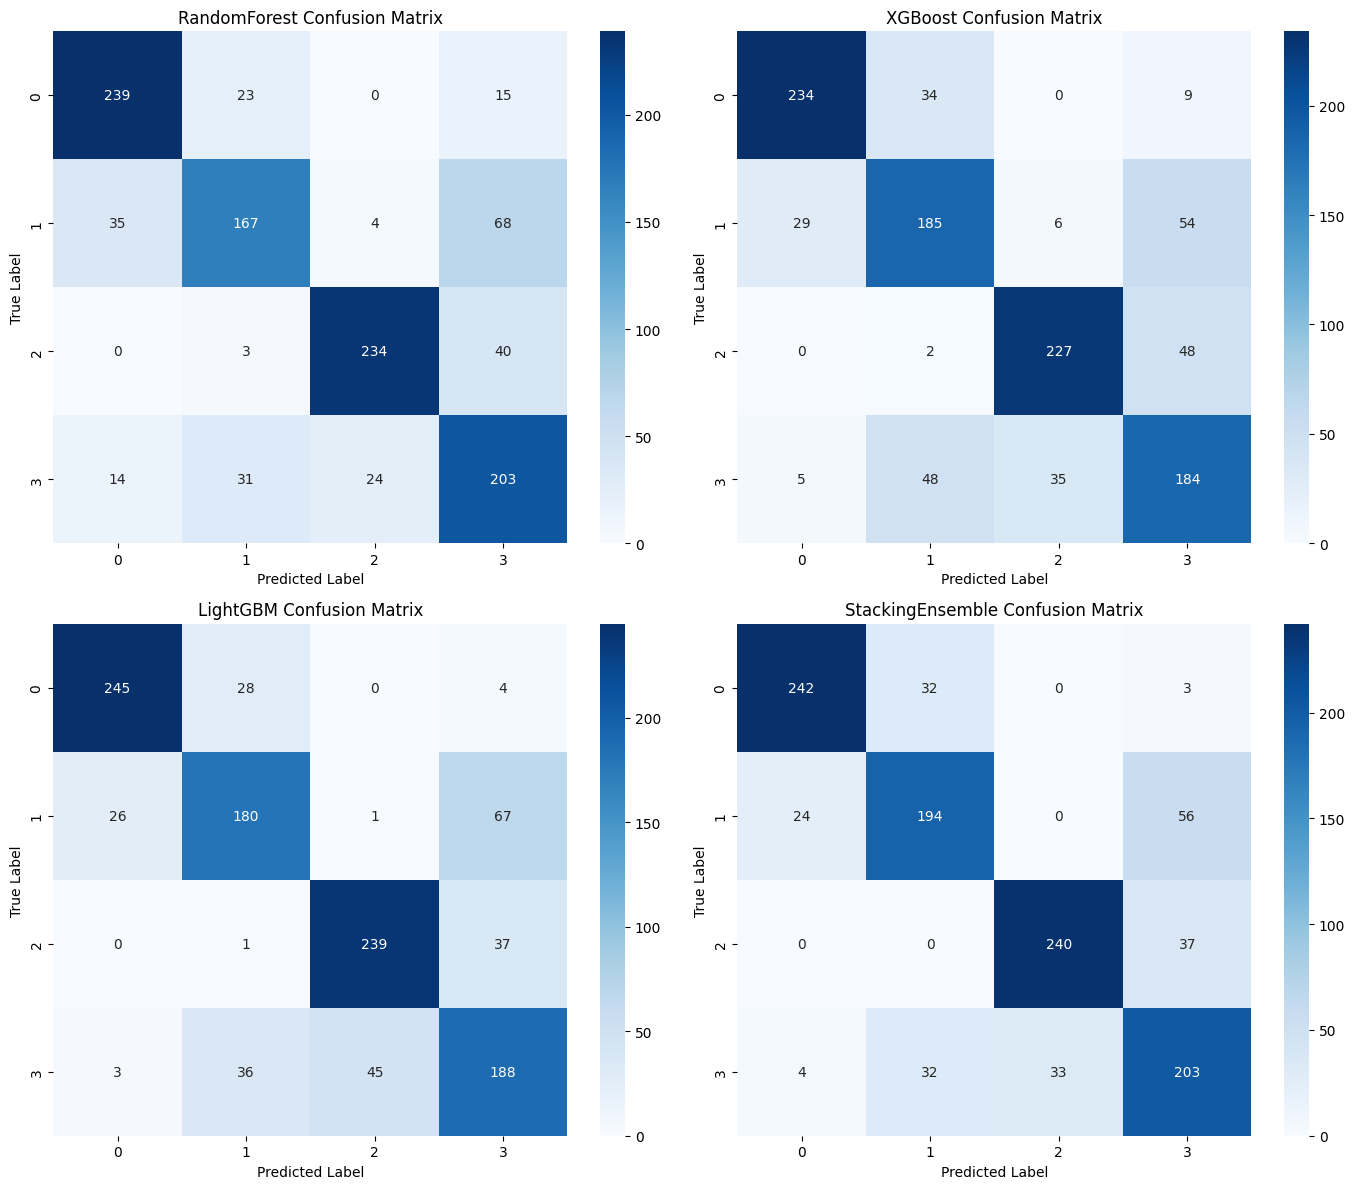

In [83]:
from sklearn.metrics import confusion_matrix
import numpy as np

models = {
    'RandomForest': best_rf,
    'XGBoost': xgb,
    'LightGBM': lgbm,
    'StackingEnsemble': stack_model
}

fig, axes = plt.subplots(2, 2, figsize=(14,12))
axes = axes.flatten()

for ax, (name, model) in zip(axes, models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, index=le.classes_, columns=le.classes_)

    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f"{name} Confusion Matrix")
    ax.set_ylabel("True Label")
    ax.set_xlabel("Predicted Label")

plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


/tmp/ipython-input-3714899152.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Metric")


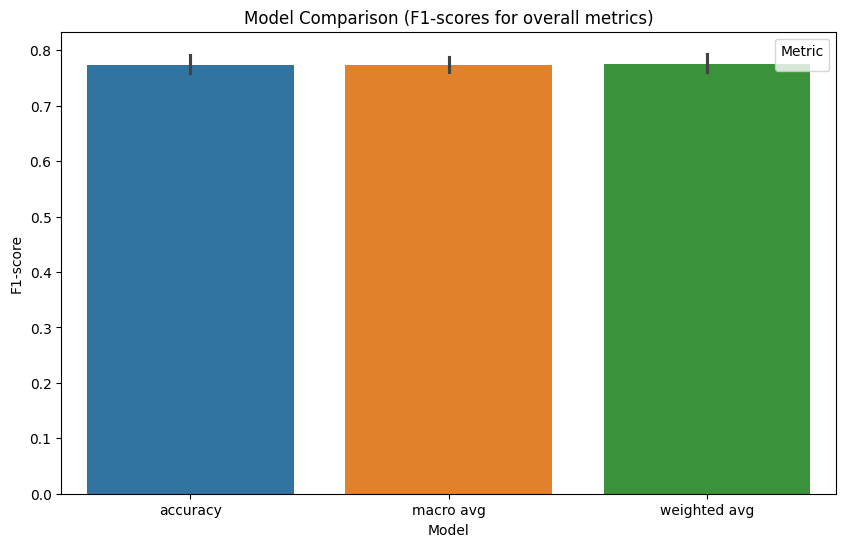

Overall Comparison:

model         LightGBM  RandomForest  StackingEnsemble   XGBoost
metric                                                          
accuracy      0.774545      0.766364          0.799091  0.754545
macro avg     0.773860      0.765976          0.799478  0.755543
weighted avg  0.774587      0.766632          0.800071  0.756230


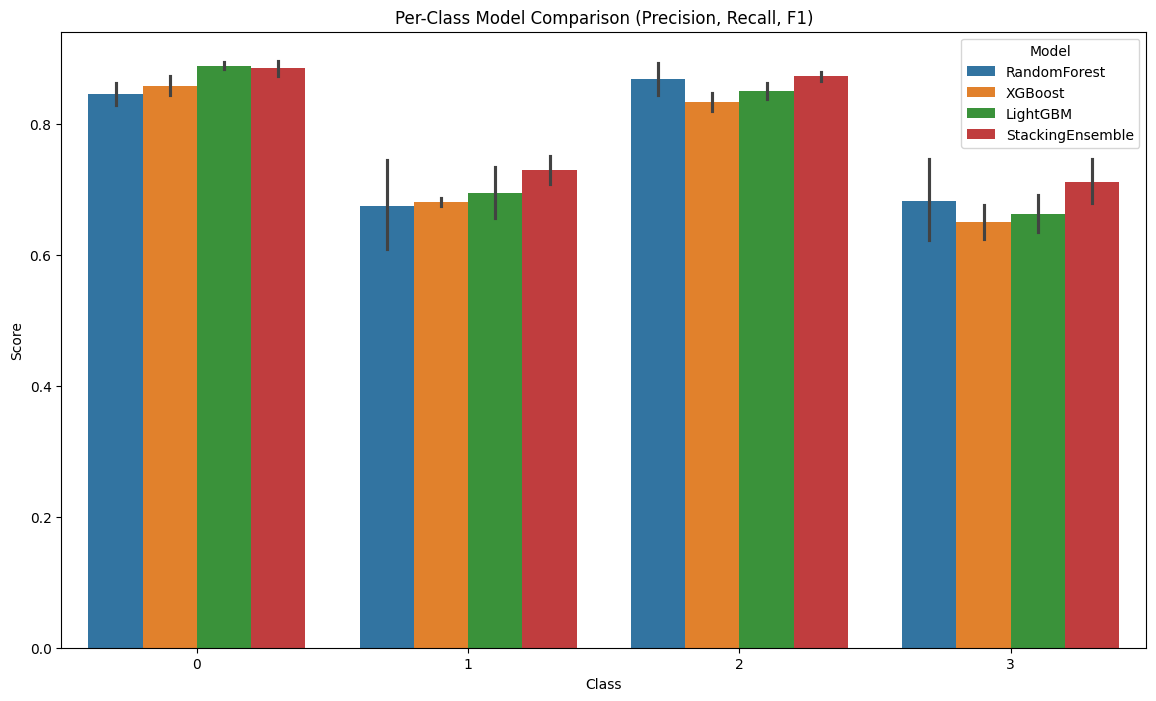

Per-Class Comparison:

   precision    recall  f1-score  support             model
0   0.829861  0.862816  0.846018    277.0      RandomForest
1   0.745536  0.609489  0.670683    274.0      RandomForest
2   0.893130  0.844765  0.868275    277.0      RandomForest
3   0.622699  0.746324  0.678930    272.0      RandomForest
0   0.873134  0.844765  0.858716    277.0           XGBoost
1   0.687732  0.675182  0.681400    274.0           XGBoost
2   0.847015  0.819495  0.833028    277.0           XGBoost
3   0.623729  0.676471  0.649030    272.0           XGBoost
0   0.894161  0.884477  0.889292    277.0          LightGBM
1   0.734694  0.656934  0.693642    274.0          LightGBM
2   0.838596  0.862816  0.850534    277.0          LightGBM
3   0.635135  0.691176  0.661972    272.0          LightGBM
0   0.896296  0.873646  0.884826    277.0  StackingEnsemble
1   0.751938  0.708029  0.729323    274.0  StackingEnsemble
2   0.879121  0.866426  0.872727    277.0  StackingEnsemble
3   0.678930  0.7

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Collect classification reports for each model
reports = {}
reports['RandomForest'] = classification_report(le.inverse_transform(y_test_encoded),
                                                le.inverse_transform(best_rf.predict(X_test)),
                                                output_dict=True)
reports['XGBoost'] = classification_report(le.inverse_transform(y_test_encoded),
                                           le.inverse_transform(xgb.predict(X_test)),
                                           output_dict=True)
reports['LightGBM'] = classification_report(le.inverse_transform(y_test_encoded),
                                            le.inverse_transform(lgbm.predict(X_test)),
                                            output_dict=True)
reports['StackingEnsemble'] = classification_report(le.inverse_transform(y_test_encoded),
                                                    le.inverse_transform(stack_model.predict(X_test)),
                                                    output_dict=True)

# Convert reports into a DataFrame for overall metrics (as done previously)
df_list_overall = []
for model_name, report in reports.items():
    df_report = pd.DataFrame(report).transpose() # Index has class names + overall metrics
    df_report['model'] = model_name
    df_list_overall.append(df_report)

comparison_df = pd.concat(df_list_overall)

# Extract overall metrics (accuracy, macro avg, weighted avg)
overall_metrics = comparison_df.loc[['accuracy','macro avg','weighted avg']]
overall_metrics = overall_metrics.reset_index().rename(columns={'index':'metric'})

# Pivot for plotting overall metrics
pivot_df = overall_metrics.pivot(index='metric', columns='model', values='f1-score')

# Plot comparison for overall metrics
plt.figure(figsize=(10,6))
sns.barplot(data=pivot_df.T)
plt.title("Model Comparison (F1-scores for overall metrics)")
plt.ylabel("F1-score")
plt.xlabel("Model")
plt.legend(title="Metric")
plt.show()

# Print table for clarity
print("Overall Comparison:\n")
print(pivot_df)

# --- Corrected section for per-class metrics ---

# Define metrics to extract
metrics = ['precision','recall','f1-score']

# Create a list to store per-class dataframes
df_list_per_class = []

for model_name, report in reports.items():
    # Filter the report dictionary to include only class-specific metrics
    # The keys for classes are numerical (0, 1, 2, 3) in the report dictionaries from the kernel state
    class_labels_in_report = [k for k in report.keys() if k.isdigit()] # Get numerical keys as strings '0', '1', '2', '3'
    class_report_filtered = {cls_key: report[cls_key] for cls_key in class_labels_in_report}

    # Create DataFrame for current model's per-class metrics
    df_per_class = pd.DataFrame(class_report_filtered).transpose()
    df_per_class['model'] = model_name
    df_list_per_class.append(df_per_class)

# Concatenate all per-class dataframes
per_class_df = pd.concat(df_list_per_class)

# Reset index (which are the numerical class labels as strings) and melt for plotting
per_class_long = per_class_df.reset_index().rename(columns={'index':'encoded_class'}).melt(id_vars=['encoded_class','model'],
                                 value_vars=metrics,
                                 var_name='metric',
                                 value_name='score')

# Map the encoded_class back to original string class names for better visualization
# Need to convert 'encoded_class' column to int first, then map using LabelEncoder
per_class_long['class'] = per_class_long['encoded_class'].astype(int).map(lambda x: le.inverse_transform([x])[0])

# Plot per-class comparison
plt.figure(figsize=(14,8))
sns.barplot(data=per_class_long, x='class', y='score', hue='model')
plt.title("Per-Class Model Comparison (Precision, Recall, F1)")
plt.ylabel("Score")
plt.xlabel("Class")
plt.legend(title="Model")
plt.show()

# Print table for clarity
print("Per-Class Comparison:\n")
# To print per_class_df with original class names, we'll map its index
per_class_df_to_print = per_class_df.copy()
per_class_df_to_print.index = per_class_df_to_print.index.astype(int).map(lambda x: le.inverse_transform([x])[0])
print(per_class_df_to_print)